# Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import time

------------------------------

# Data slicing 

In [2]:
input_path = 'yacht.csv'
input_ds = pd.read_csv(input_path, header = None)
#insert initial bias vector in the first column
input_ds.insert(0,None,np.ones(input_ds.shape[0]))
n_cols = len(input_ds.columns)
print("Number of columns:", n_cols)

Number of columns: 8


## Vectorization

In [3]:
#vectorization of input data

#from the first column to second last column is assign as x values
x = input_ds.iloc[:,0:n_cols -1]
#last column is the target values with is y
y = input_ds.iloc[:,n_cols-1]

print("Shape of x values:", x.shape)
print("Shape of y values:", y.shape)

Shape of x values: (308, 7)
Shape of y values: (308,)


-----------------------------------------------

# Plotting Correlations

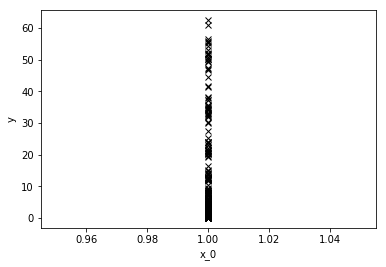

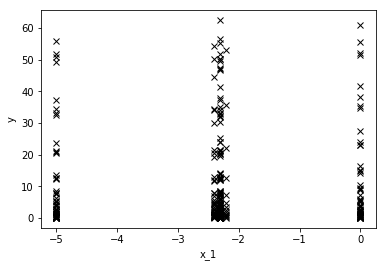

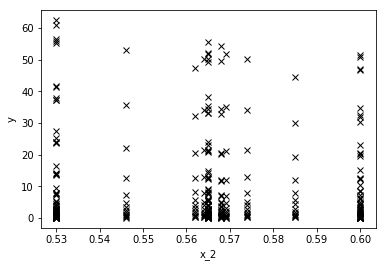

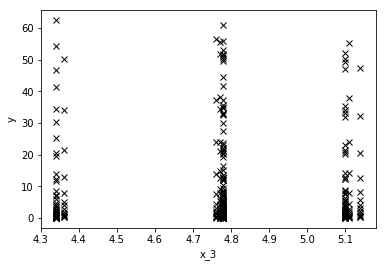

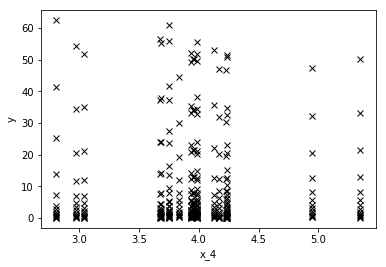

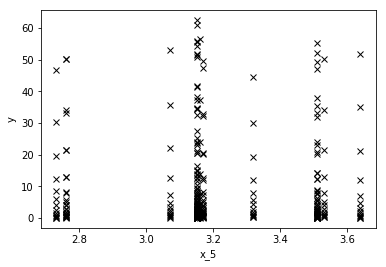

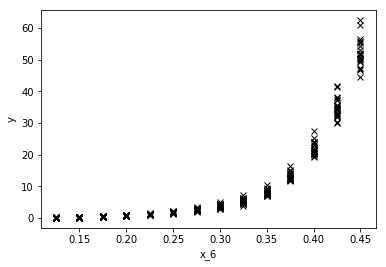

In [4]:
#only for plotting
x = np.squeeze(np.asarray(x))
for i in range(x.shape[1]):
    plt.plot(x[:,i], y, 'kx')
    plt.xlabel('x_{}'.format(i))
    plt.ylabel('y')
    plt.show()

In [5]:
#grid plot 
def grid_plot_2col(x, y, x_col, marker = 'kx',figsize=(10,18)):
    '''
    Plot grid of figures with 2 columns by default
    @param x: x array
    @param y: y array
    @param x_col: number of columns for x data set
    @param marker: Data points marker shape in plot
    @param figsize: Figure size of grid plot output
    
    return: A figure containing grid plot 
    '''
    # if number of x columns is odd number
    if x_col%2 != 0:
        plot_row = int((x_col + 1)/2)
    # if number of x columns is even number
    else:
        plot_row = int(x_col/2)
    
    fig, axes = plt.subplots(plot_row, 2, figsize=figsize)
    fig.suptitle("Correlations between Data Points and Target Values", fontsize=16)

    if x_col%2 != 0:
        #delete last axes since x columns is odd number
        fig.delaxes(axes[plot_row-1,1])
        for i, ax in enumerate(axes.flat): 
            if i == x_col: break
            ax.plot(x[:,i], y, marker)
            ax.set_xlabel('x_{}'.format(i))
            ax.set_ylabel('y')
    else:
        for i, ax in enumerate(axes.flat):  
            ax.plot(x[:,i], y, marker)
            ax.set_xlabel('x_{}'.format(i))
            ax.set_ylabel('y')

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

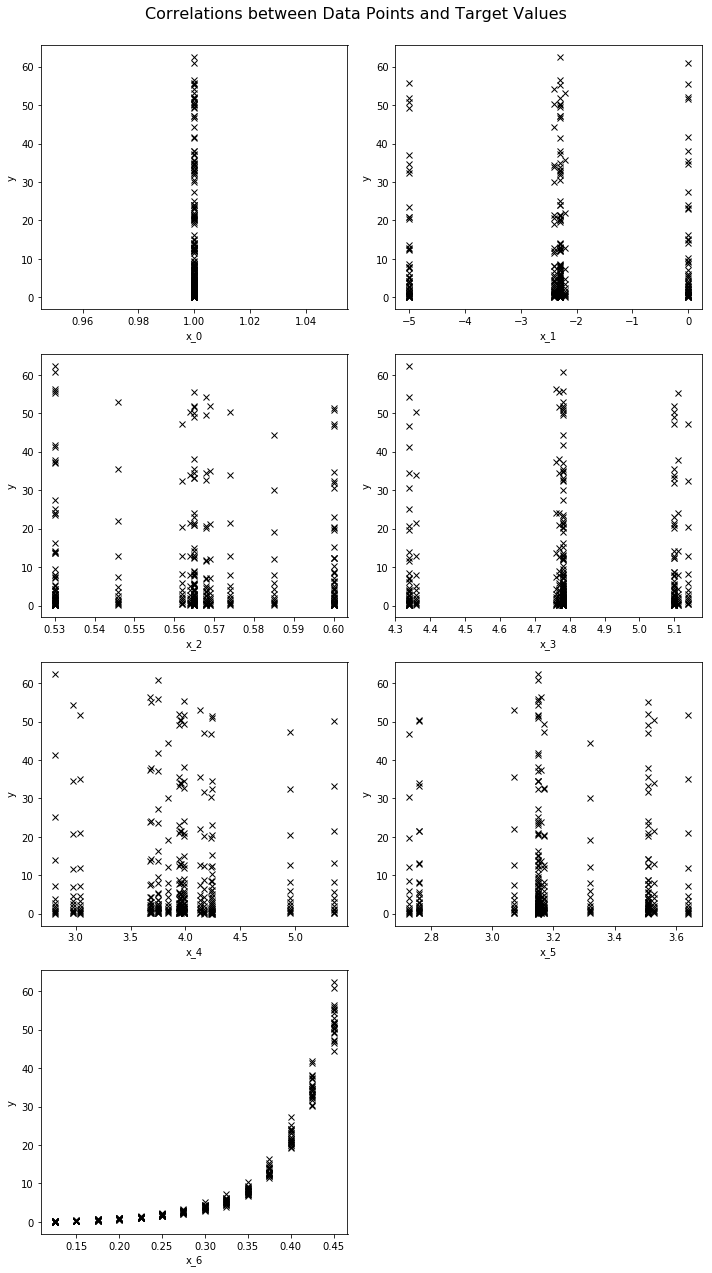

In [6]:
grid_plot_2col(x, y, n_cols-1)

---------------------------------------

# Helper Functions

In [5]:
def set_array(inps):
    '''
    @param inps: sliced data frame
    Converts dataframe into numpy array for easy work out
    '''
    inps = np.asarray(inps)
    #squeeze to remove indexing column from pandas
    return np.squeeze(inps)

def sq_loss(y_true, y_pred):
    '''
    Compute sum of squared loss
    @param y_true: array of target values/labels
    @param y_pred: array of predicted values
    
    return: sum of squared loss
    '''
    #squaring loss
    sq = (y_true - y_pred)**2 
    return np.sum(sq)

def grad(x, y_true, y_pred):
    '''
    Compute the gradient of lost function 
    @param x: array of data points
    @param y: data points of y_true
    @param y_pred: predicted target values
    
    return: gradient of shape [3,1]
    '''
    # x.shape [1000x3], error.shape [1000x1]
    #hence written as np.dot(x^T,error)
    return np.dot(x.transpose(),(y_true - y_pred))

----------------------------------------------------

# Main

In [6]:
#convert data frames to numpy arrays
x = set_array(x)
y = set_array(y)

#sanity check
print("Header for x is", x[:5,:])
print("Header for y is", y[:5])

Header for x is [[ 1.    -2.3    0.568  4.78   3.99   3.17   0.125]
 [ 1.    -2.3    0.568  4.78   3.99   3.17   0.15 ]
 [ 1.    -2.3    0.568  4.78   3.99   3.17   0.175]
 [ 1.    -2.3    0.568  4.78   3.99   3.17   0.2  ]
 [ 1.    -2.3    0.568  4.78   3.99   3.17   0.225]]
Header for y is [0.11 0.27 0.47 0.78 1.18]


## Gradient Descent

In [7]:
lr = 0.0001
threshold = 0.0001
iters = 0
loss_list = []
error = 1000 #random value for initializing error

#dynamic print heading
print("{:<5}".format("Iter"), end='')
for i in range(n_cols -1):
    print("{:^8}".format('w_'+str(i)), end = '')
print("{:>6}".format('SSE'))

#measure execution time
ex_start = time.process_time()
#stopping criteria 
while error>=threshold:
    if iters == 0:
        #initialize with all weights as 0
        w = np.zeros(n_cols -1)
    else:
        #update each weights respectively
        w += lr*grad(x, y, y_pred)
    
    #y_pred = w.x with => x.shape [1000x3], w.shape [3x1]
    #hence written as x.w 
    y_pred = np.dot(x,w) 
    loss = sq_loss(y, y_pred)
    loss_list.append(loss)
    
    if iters == 0:
        error = loss
    else:
        error = loss_list[iters-1] - loss_list[iters]
    
    #dynamic print values
    print("{:^6}".format(iters), end='')
    for i in range(n_cols -1):
        print("{:^8.4f}".format(w[i].round(4)), end = '')
    print("{:>11.4f}".format(loss.round(4)))
    
    #update iteration
    iters+=1
    
ex_elapsed = (time.process_time() - ex_start)
print()
print("--End of iteration! After: {} interations--".format(iters))
print("--Execution time: {} s --".format(ex_elapsed))

Iter   w_0     w_1     w_2     w_3     w_4     w_5     w_6      SSE
  0    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000 104487.9979
  1    0.3233 -0.7563  0.1821  1.5476  1.2694  1.0365  0.1310  88778.3711
  2    0.0922 -0.1392  0.0512  0.4343  0.3441  0.2934  0.1026  80371.1853
  3    0.2658 -0.5294  0.1488  1.2637  1.0211  0.8496  0.1905  75861.5764
  4    0.1437 -0.1877  0.0795  0.6732  0.5270  0.4561  0.1934  73432.7230
  5    0.2374 -0.3842  0.1320  1.1189  0.8876  0.7557  0.2584  72115.1189
  6    0.1733 -0.1908  0.0954  0.8069  0.6233  0.5484  0.2779  71391.3578
  7    0.2243 -0.2854  0.1239  1.0477  0.8149  0.7109  0.3306  70985.2658
  8    0.1911 -0.1726  0.1047  0.8840  0.6729  0.6028  0.3590  70749.3917
  9    0.2193 -0.2140  0.1202  1.0151  0.7740  0.6919  0.4050  70604.9760
  10   0.2025 -0.1454  0.1104  0.9302  0.6971  0.6366  0.4381  70509.9201
  11   0.2185 -0.1596  0.1190  1.0025  0.7499  0.6863  0.4806  70441.6953
  12   0.2104 -0.1156  0.1140  0.9594  0.707

 379   0.5049  0.1774  0.1647  0.9995 -0.1147  0.6300 13.7370  60714.1314
 380   0.5054  0.1774  0.1647  0.9989 -0.1156  0.6288 13.7709  60691.0922
 381   0.5059  0.1774  0.1647  0.9983 -0.1164  0.6275 13.8048  60668.0678
 382   0.5064  0.1775  0.1647  0.9977 -0.1172  0.6263 13.8387  60645.0581
 383   0.5068  0.1775  0.1647  0.9971 -0.1181  0.6251 13.8726  60622.0632
 384   0.5073  0.1775  0.1647  0.9964 -0.1189  0.6239 13.9064  60599.0831
 385   0.5078  0.1776  0.1647  0.9958 -0.1197  0.6226 13.9403  60576.1178
 386   0.5083  0.1776  0.1647  0.9952 -0.1205  0.6214 13.9741  60553.1671
 387   0.5088  0.1776  0.1647  0.9946 -0.1213  0.6202 14.0080  60530.2312
 388   0.5092  0.1777  0.1647  0.9940 -0.1221  0.6189 14.0418  60507.3101
 389   0.5097  0.1777  0.1646  0.9934 -0.1229  0.6177 14.0756  60484.4036
 390   0.5102  0.1777  0.1646  0.9928 -0.1237  0.6165 14.1094  60461.5118
 391   0.5107  0.1778  0.1646  0.9921 -0.1245  0.6152 14.1432  60438.6348
 392   0.5112  0.1778  0.1646  0.9915 

 768   0.6315  0.1877  0.1326  0.7563 -0.3324  0.1255 26.1386  52778.1570
 769   0.6317  0.1878  0.1325  0.7558 -0.3329  0.1242 26.1686  52760.1935
 770   0.6319  0.1878  0.1323  0.7552 -0.3333  0.1229 26.1985  52742.2414
 771   0.6321  0.1878  0.1322  0.7546 -0.3337  0.1216 26.2284  52724.3008
 772   0.6322  0.1878  0.1320  0.7540 -0.3342  0.1203 26.2583  52706.3717
 773   0.6324  0.1878  0.1318  0.7534 -0.3346  0.1191 26.2882  52688.4541
 774   0.6326  0.1879  0.1317  0.7528 -0.3350  0.1178 26.3181  52670.5478
 775   0.6328  0.1879  0.1315  0.7522 -0.3355  0.1165 26.3480  52652.6531
 776   0.6330  0.1879  0.1314  0.7516 -0.3359  0.1152 26.3778  52634.7697
 777   0.6331  0.1879  0.1312  0.7510 -0.3363  0.1140 26.4077  52616.8978
 778   0.6333  0.1880  0.1311  0.7505 -0.3368  0.1127 26.4376  52599.0372
 779   0.6335  0.1880  0.1309  0.7499 -0.3372  0.1114 26.4674  52581.1881
 780   0.6337  0.1880  0.1307  0.7493 -0.3376  0.1102 26.4972  52563.3504
 781   0.6338  0.1880  0.1306  0.7487 

 1158  0.6543  0.1957  0.0476  0.5493 -0.4861 -0.3448 37.1176  46574.5802
 1159  0.6543  0.1957  0.0473  0.5488 -0.4865 -0.3460 37.1440  46560.5755
 1160  0.6542  0.1957  0.0470  0.5484 -0.4868 -0.3471 37.1704  46546.5798
 1161  0.6541  0.1958  0.0467  0.5479 -0.4872 -0.3482 37.1968  46532.5929
 1162  0.6541  0.1958  0.0465  0.5474 -0.4876 -0.3494 37.2232  46518.6150
 1163  0.6540  0.1958  0.0462  0.5470 -0.4879 -0.3505 37.2496  46504.6460
 1164  0.6540  0.1958  0.0459  0.5465 -0.4883 -0.3516 37.2760  46490.6858
 1165  0.6539  0.1958  0.0456  0.5460 -0.4886 -0.3528 37.3024  46476.7346
 1166  0.6538  0.1959  0.0453  0.5455 -0.4890 -0.3539 37.3288  46462.7923
 1167  0.6538  0.1959  0.0451  0.5451 -0.4894 -0.3550 37.3551  46448.8589
 1168  0.6537  0.1959  0.0448  0.5446 -0.4897 -0.3562 37.3815  46434.9343
 1169  0.6536  0.1959  0.0445  0.5441 -0.4901 -0.3573 37.4078  46421.0187
 1170  0.6536  0.1959  0.0442  0.5437 -0.4904 -0.3584 37.4342  46407.1119
 1171  0.6535  0.1959  0.0439  0.5432 

 1601  0.5769  0.2032 -0.1014  0.3676 -0.6349 -0.8117 48.0391  41167.7268
 1602  0.5766  0.2032 -0.1018  0.3672 -0.6352 -0.8126 48.0620  41157.1661
 1603  0.5764  0.2032 -0.1022  0.3669 -0.6356 -0.8136 48.0850  41146.6121
 1604  0.5761  0.2033 -0.1026  0.3665 -0.6359 -0.8146 48.1079  41136.0648
 1605  0.5758  0.2033 -0.1030  0.3662 -0.6362 -0.8156 48.1308  41125.5242
 1606  0.5755  0.2033 -0.1034  0.3658 -0.6365 -0.8166 48.1538  41114.9903
 1607  0.5752  0.2033 -0.1038  0.3655 -0.6368 -0.8175 48.1767  41104.4631
 1608  0.5749  0.2033 -0.1042  0.3651 -0.6371 -0.8185 48.1996  41093.9426
 1609  0.5746  0.2033 -0.1046  0.3648 -0.6374 -0.8195 48.2225  41083.4288
 1610  0.5743  0.2034 -0.1050  0.3644 -0.6377 -0.8205 48.2454  41072.9217
 1611  0.5741  0.2034 -0.1054  0.3641 -0.6380 -0.8214 48.2682  41062.4213
 1612  0.5738  0.2034 -0.1057  0.3637 -0.6383 -0.8224 48.2911  41051.9276
 1613  0.5735  0.2034 -0.1061  0.3634 -0.6387 -0.8234 48.3140  41041.4405
 1614  0.5732  0.2034 -0.1065  0.3630 

 2046  0.4077  0.2094 -0.2968  0.2345 -0.7628 -1.2161 57.5626  37073.3071
 2047  0.4072  0.2094 -0.2973  0.2342 -0.7631 -1.2170 57.5825  37065.3482
 2048  0.4068  0.2094 -0.2978  0.2340 -0.7633 -1.2178 57.6024  37057.3943
 2049  0.4063  0.2094 -0.2982  0.2337 -0.7636 -1.2186 57.6223  37049.4455
 2050  0.4058  0.2094 -0.2987  0.2335 -0.7639 -1.2195 57.6422  37041.5017
 2051  0.4053  0.2094 -0.2992  0.2332 -0.7641 -1.2203 57.6621  37033.5630
 2052  0.4049  0.2095 -0.2997  0.2330 -0.7644 -1.2212 57.6820  37025.6292
 2053  0.4044  0.2095 -0.3002  0.2327 -0.7647 -1.2220 57.7019  37017.7006
 2054  0.4039  0.2095 -0.3007  0.2325 -0.7649 -1.2229 57.7218  37009.7769
 2055  0.4035  0.2095 -0.3011  0.2322 -0.7652 -1.2237 57.7416  37001.8583
 2056  0.4030  0.2095 -0.3016  0.2320 -0.7655 -1.2245 57.7615  36993.9447
 2057  0.4025  0.2095 -0.3021  0.2317 -0.7657 -1.2254 57.7814  36986.0361
 2058  0.4020  0.2095 -0.3026  0.2315 -0.7660 -1.2262 57.8012  36978.1326
 2059  0.4016  0.2095 -0.3031  0.2312 

 2490  0.1644  0.2144 -0.5281  0.1432 -0.8718 -1.5638 65.8111  33992.4644
 2491  0.1638  0.2144 -0.5287  0.1431 -0.8720 -1.5645 65.8284  33986.4576
 2492  0.1632  0.2144 -0.5292  0.1429 -0.8723 -1.5653 65.8457  33980.4546
 2493  0.1625  0.2144 -0.5298  0.1427 -0.8725 -1.5660 65.8630  33974.4554
 2494  0.1619  0.2144 -0.5303  0.1426 -0.8727 -1.5667 65.8803  33968.4600
 2495  0.1613  0.2144 -0.5309  0.1424 -0.8729 -1.5674 65.8975  33962.4684
 2496  0.1607  0.2144 -0.5314  0.1423 -0.8732 -1.5682 65.9148  33956.4806
 2497  0.1600  0.2144 -0.5320  0.1421 -0.8734 -1.5689 65.9321  33950.4966
 2498  0.1594  0.2144 -0.5326  0.1419 -0.8736 -1.5696 65.9493  33944.5163
 2499  0.1588  0.2145 -0.5331  0.1418 -0.8738 -1.5703 65.9666  33938.5398
 2500  0.1582  0.2145 -0.5337  0.1416 -0.8741 -1.5710 65.9838  33932.5671
 2501  0.1575  0.2145 -0.5342  0.1414 -0.8743 -1.5718 66.0011  33926.5982
 2502  0.1569  0.2145 -0.5348  0.1413 -0.8745 -1.5725 66.0183  33920.6331
 2503  0.1563  0.2145 -0.5353  0.1411 

 2934 -0.1389  0.2183 -0.7879  0.0868 -0.9648 -1.8631 72.9738  31666.2385
 2935 -0.1396  0.2184 -0.7885  0.0867 -0.9650 -1.8638 72.9888  31661.7006
 2936 -0.1403  0.2184 -0.7891  0.0866 -0.9652 -1.8644 73.0038  31657.1656
 2937 -0.1411  0.2184 -0.7898  0.0866 -0.9654 -1.8650 73.0188  31652.6334
 2938 -0.1418  0.2184 -0.7904  0.0865 -0.9656 -1.8656 73.0338  31648.1041
 2939 -0.1426  0.2184 -0.7910  0.0864 -0.9657 -1.8663 73.0488  31643.5777
 2940 -0.1433  0.2184 -0.7916  0.0863 -0.9659 -1.8669 73.0638  31639.0541
 2941 -0.1441  0.2184 -0.7922  0.0862 -0.9661 -1.8675 73.0788  31634.5333
 2942 -0.1448  0.2184 -0.7928  0.0861 -0.9663 -1.8681 73.0938  31630.0154
 2943 -0.1455  0.2184 -0.7934  0.0860 -0.9665 -1.8688 73.1088  31625.5004
 2944 -0.1463  0.2184 -0.7940  0.0859 -0.9667 -1.8694 73.1238  31620.9882
 2945 -0.1470  0.2184 -0.7947  0.0858 -0.9669 -1.8700 73.1387  31616.4788
 2946 -0.1478  0.2184 -0.7953  0.0857 -0.9671 -1.8706 73.1537  31611.9723
 2947 -0.1485  0.2184 -0.7959  0.0856 

 3379 -0.4906  0.2215 -1.0702  0.0594 -1.0441 -2.1211 79.2078  29904.5055
 3380 -0.4914  0.2215 -1.0709  0.0594 -1.0442 -2.1217 79.2208  29901.0756
 3381 -0.4923  0.2215 -1.0715  0.0594 -1.0444 -2.1222 79.2339  29897.6477
 3382 -0.4931  0.2215 -1.0722  0.0593 -1.0446 -2.1228 79.2469  29894.2220
 3383 -0.4939  0.2215 -1.0729  0.0593 -1.0447 -2.1233 79.2599  29890.7985
 3384 -0.4948  0.2215 -1.0735  0.0593 -1.0449 -2.1238 79.2730  29887.3771
 3385 -0.4956  0.2215 -1.0742  0.0592 -1.0451 -2.1244 79.2860  29883.9579
 3386 -0.4965  0.2215 -1.0748  0.0592 -1.0452 -2.1249 79.2990  29880.5408
 3387 -0.4973  0.2215 -1.0755  0.0592 -1.0454 -2.1254 79.3120  29877.1258
 3388 -0.4981  0.2215 -1.0761  0.0592 -1.0456 -2.1260 79.3250  29873.7130
 3389 -0.4990  0.2215 -1.0768  0.0591 -1.0457 -2.1265 79.3380  29870.3023
 3390 -0.4998  0.2216 -1.0774  0.0591 -1.0459 -2.1270 79.3510  29866.8938
 3391 -0.5006  0.2216 -1.0781  0.0591 -1.0460 -2.1276 79.3640  29863.4874
 3392 -0.5015  0.2216 -1.0787  0.0590 

 3823 -0.8788  0.2239 -1.3681  0.0562 -1.1112 -2.3423 84.6103  28574.6319
 3824 -0.8797  0.2239 -1.3688  0.0562 -1.1114 -2.3427 84.6216  28572.0341
 3825 -0.8806  0.2239 -1.3695  0.0563 -1.1115 -2.3432 84.6329  28569.4380
 3826 -0.8815  0.2239 -1.3702  0.0563 -1.1116 -2.3437 84.6442  28566.8434
 3827 -0.8824  0.2239 -1.3709  0.0563 -1.1118 -2.3441 84.6556  28564.2505
 3828 -0.8833  0.2239 -1.3716  0.0563 -1.1119 -2.3446 84.6669  28561.6591
 3829 -0.8843  0.2239 -1.3722  0.0563 -1.1121 -2.3450 84.6782  28559.0694
 3830 -0.8852  0.2239 -1.3729  0.0564 -1.1122 -2.3455 84.6895  28556.4813
 3831 -0.8861  0.2239 -1.3736  0.0564 -1.1123 -2.3460 84.7008  28553.8949
 3832 -0.8870  0.2239 -1.3743  0.0564 -1.1125 -2.3464 84.7121  28551.3100
 3833 -0.8879  0.2239 -1.3750  0.0564 -1.1126 -2.3469 84.7234  28548.7267
 3834 -0.8888  0.2239 -1.3757  0.0564 -1.1128 -2.3473 84.7347  28546.1451
 3835 -0.8897  0.2240 -1.3764  0.0564 -1.1129 -2.3478 84.7460  28543.5651
 3836 -0.8906  0.2240 -1.3770  0.0565 

 4254 -1.2828  0.2256 -1.6683  0.0722 -1.1665 -2.5269 89.1762  27592.3802
 4255 -1.2838  0.2257 -1.6690  0.0722 -1.1667 -2.5273 89.1861  27590.3935
 4256 -1.2847  0.2257 -1.6697  0.0723 -1.1668 -2.5277 89.1960  27588.4080
 4257 -1.2857  0.2257 -1.6704  0.0723 -1.1669 -2.5281 89.2058  27586.4238
 4258 -1.2866  0.2257 -1.6711  0.0724 -1.1670 -2.5285 89.2157  27584.4407
 4259 -1.2876  0.2257 -1.6718  0.0724 -1.1671 -2.5289 89.2256  27582.4590
 4260 -1.2886  0.2257 -1.6725  0.0725 -1.1672 -2.5293 89.2355  27580.4784
 4261 -1.2895  0.2257 -1.6732  0.0725 -1.1674 -2.5297 89.2453  27578.4991
 4262 -1.2905  0.2257 -1.6739  0.0726 -1.1675 -2.5300 89.2552  27576.5210
 4263 -1.2915  0.2257 -1.6746  0.0727 -1.1676 -2.5304 89.2651  27574.5441
 4264 -1.2924  0.2257 -1.6753  0.0727 -1.1677 -2.5308 89.2749  27572.5684
 4265 -1.2934  0.2257 -1.6761  0.0728 -1.1678 -2.5312 89.2848  27570.5940
 4266 -1.2944  0.2257 -1.6768  0.0728 -1.1679 -2.5316 89.2946  27568.6208
 4267 -1.2953  0.2257 -1.6775  0.0729 

 4656 -1.6776  0.2268 -1.9547  0.1009 -1.2105 -2.6758 92.9094  26885.1051
 4657 -1.6786  0.2268 -1.9554  0.1010 -1.2106 -2.6761 92.9181  26883.5556
 4658 -1.6796  0.2268 -1.9562  0.1011 -1.2107 -2.6765 92.9268  26882.0069
 4659 -1.6806  0.2269 -1.9569  0.1012 -1.2108 -2.6768 92.9355  26880.4593
 4660 -1.6816  0.2269 -1.9576  0.1013 -1.2109 -2.6772 92.9442  26878.9126
 4661 -1.6826  0.2269 -1.9583  0.1014 -1.2110 -2.6775 92.9529  26877.3668
 4662 -1.6836  0.2269 -1.9590  0.1015 -1.2111 -2.6779 92.9616  26875.8220
 4663 -1.6846  0.2269 -1.9598  0.1015 -1.2112 -2.6782 92.9703  26874.2781
 4664 -1.6856  0.2269 -1.9605  0.1016 -1.2113 -2.6786 92.9790  26872.7352
 4665 -1.6866  0.2269 -1.9612  0.1017 -1.2114 -2.6789 92.9877  26871.1933
 4666 -1.6876  0.2269 -1.9619  0.1018 -1.2115 -2.6792 92.9964  26869.6523
 4667 -1.6886  0.2269 -1.9626  0.1019 -1.2116 -2.6796 93.0050  26868.1122
 4668 -1.6896  0.2269 -1.9633  0.1020 -1.2117 -2.6799 93.0137  26866.5731
 4669 -1.6906  0.2269 -1.9641  0.1021 

 5101 -2.1290  0.2277 -2.2760  0.1456 -1.2518 -2.8179 96.5258  26281.5746
 5102 -2.1300  0.2277 -2.2767  0.1457 -1.2519 -2.8182 96.5333  26280.3952
 5103 -2.1311  0.2277 -2.2774  0.1459 -1.2519 -2.8185 96.5409  26279.2164
 5104 -2.1321  0.2277 -2.2782  0.1460 -1.2520 -2.8188 96.5485  26278.0384
 5105 -2.1331  0.2278 -2.2789  0.1461 -1.2521 -2.8191 96.5560  26276.8611
 5106 -2.1341  0.2278 -2.2796  0.1462 -1.2522 -2.8194 96.5636  26275.6845
 5107 -2.1352  0.2278 -2.2803  0.1463 -1.2523 -2.8196 96.5712  26274.5086
 5108 -2.1362  0.2278 -2.2811  0.1464 -1.2524 -2.8199 96.5787  26273.3335
 5109 -2.1372  0.2278 -2.2818  0.1465 -1.2524 -2.8202 96.5863  26272.1591
 5110 -2.1382  0.2278 -2.2825  0.1467 -1.2525 -2.8205 96.5938  26270.9853
 5111 -2.1393  0.2278 -2.2832  0.1468 -1.2526 -2.8208 96.6014  26269.8123
 5112 -2.1403  0.2278 -2.2840  0.1469 -1.2527 -2.8211 96.6089  26268.6401
 5113 -2.1413  0.2278 -2.2847  0.1470 -1.2528 -2.8214 96.6164  26267.4685
 5114 -2.1424  0.2278 -2.2854  0.1471 

 5545 -2.5892  0.2283 -2.5982  0.2011 -1.2862 -2.9389 99.6629  25822.5299
 5546 -2.5902  0.2283 -2.5989  0.2012 -1.2863 -2.9391 99.6695  25821.6292
 5547 -2.5913  0.2283 -2.5996  0.2013 -1.2863 -2.9394 99.6761  25820.7291
 5548 -2.5923  0.2283 -2.6003  0.2015 -1.2864 -2.9396 99.6827  25819.8295
 5549 -2.5934  0.2283 -2.6011  0.2016 -1.2865 -2.9399 99.6893  25818.9304
 5550 -2.5944  0.2283 -2.6018  0.2017 -1.2866 -2.9401 99.6958  25818.0319
 5551 -2.5955  0.2283 -2.6025  0.2019 -1.2866 -2.9404 99.7024  25817.1339
 5552 -2.5965  0.2283 -2.6033  0.2020 -1.2867 -2.9406 99.7090  25816.2365
 5553 -2.5976  0.2283 -2.6040  0.2021 -1.2868 -2.9409 99.7156  25815.3396
 5554 -2.5986  0.2283 -2.6047  0.2023 -1.2868 -2.9411 99.7221  25814.4433
 5555 -2.5996  0.2283 -2.6054  0.2024 -1.2869 -2.9414 99.7287  25813.5475
 5556 -2.6007  0.2283 -2.6062  0.2025 -1.2870 -2.9417 99.7352  25812.6522
 5557 -2.6017  0.2283 -2.6069  0.2027 -1.2870 -2.9419 99.7418  25811.7575
 5558 -2.6028  0.2283 -2.6076  0.2028 

 5990 -3.0557  0.2285 -2.9203  0.2652 -1.3149 -3.0422 102.3976 25470.7905
 5991 -3.0568  0.2285 -2.9211  0.2653 -1.3150 -3.0424 102.4033 25470.1009
 5992 -3.0578  0.2285 -2.9218  0.2655 -1.3150 -3.0426 102.4090 25469.4118
 5993 -3.0589  0.2285 -2.9225  0.2656 -1.3151 -3.0428 102.4147 25468.7231
 5994 -3.0599  0.2285 -2.9232  0.2658 -1.3151 -3.0430 102.4205 25468.0348
 5995 -3.0610  0.2285 -2.9239  0.2659 -1.3152 -3.0433 102.4262 25467.3469
 5996 -3.0620  0.2285 -2.9247  0.2661 -1.3153 -3.0435 102.4319 25466.6595
 5997 -3.0631  0.2285 -2.9254  0.2663 -1.3153 -3.0437 102.4376 25465.9724
 5998 -3.0641  0.2285 -2.9261  0.2664 -1.3154 -3.0439 102.4433 25465.2858
 5999 -3.0652  0.2285 -2.9268  0.2666 -1.3154 -3.0441 102.4490 25464.5995
 6000 -3.0662  0.2285 -2.9275  0.2667 -1.3155 -3.0443 102.4547 25463.9137
 6001 -3.0673  0.2285 -2.9283  0.2669 -1.3155 -3.0445 102.4605 25463.2283
 6002 -3.0683  0.2285 -2.9290  0.2670 -1.3156 -3.0448 102.4662 25462.5433
 6003 -3.0694  0.2285 -2.9297  0.2672 

 6434 -3.5226  0.2284 -3.2391  0.3358 -1.3386 -3.1297 104.7714 25201.5926
 6435 -3.5237  0.2284 -3.2398  0.3359 -1.3386 -3.1299 104.7764 25201.0625
 6436 -3.5247  0.2284 -3.2405  0.3361 -1.3387 -3.1301 104.7814 25200.5328
 6437 -3.5258  0.2284 -3.2412  0.3363 -1.3387 -3.1303 104.7864 25200.0033
 6438 -3.5268  0.2284 -3.2419  0.3364 -1.3388 -3.1305 104.7913 25199.4741
 6439 -3.5279  0.2284 -3.2426  0.3366 -1.3388 -3.1307 104.7963 25198.9453
 6440 -3.5289  0.2284 -3.2434  0.3368 -1.3389 -3.1308 104.8013 25198.4168
 6441 -3.5300  0.2284 -3.2441  0.3369 -1.3389 -3.1310 104.8063 25197.8885
 6442 -3.5310  0.2284 -3.2448  0.3371 -1.3389 -3.1312 104.8112 25197.3606
 6443 -3.5321  0.2284 -3.2455  0.3373 -1.3390 -3.1314 104.8162 25196.8330
 6444 -3.5331  0.2284 -3.2462  0.3374 -1.3390 -3.1316 104.8212 25196.3057
 6445 -3.5342  0.2284 -3.2469  0.3376 -1.3391 -3.1317 104.8262 25195.7787
 6446 -3.5352  0.2284 -3.2476  0.3378 -1.3391 -3.1319 104.8311 25195.2521
 6447 -3.5363  0.2284 -3.2484  0.3379 

 6878 -3.9879  0.2282 -3.5535  0.4113 -1.3580 -3.2039 106.8379 24994.2387
 6879 -3.9889  0.2282 -3.5542  0.4115 -1.3580 -3.2041 106.8422 24993.8295
 6880 -3.9900  0.2282 -3.5550  0.4117 -1.3580 -3.2042 106.8465 24993.4205
 6881 -3.9910  0.2282 -3.5557  0.4119 -1.3581 -3.2044 106.8509 24993.0117
 6882 -3.9920  0.2282 -3.5564  0.4120 -1.3581 -3.2045 106.8552 24992.6032
 6883 -3.9931  0.2282 -3.5571  0.4122 -1.3581 -3.2047 106.8595 24992.1950
 6884 -3.9941  0.2282 -3.5578  0.4124 -1.3582 -3.2048 106.8639 24991.7869
 6885 -3.9952  0.2282 -3.5585  0.4126 -1.3582 -3.2050 106.8682 24991.3791
 6886 -3.9962  0.2282 -3.5592  0.4127 -1.3583 -3.2051 106.8725 24990.9715
 6887 -3.9973  0.2282 -3.5599  0.4129 -1.3583 -3.2053 106.8769 24990.5642
 6888 -3.9983  0.2282 -3.5606  0.4131 -1.3583 -3.2054 106.8812 24990.1571
 6889 -3.9994  0.2282 -3.5613  0.4133 -1.3584 -3.2056 106.8855 24989.7503
 6890 -4.0004  0.2282 -3.5620  0.4134 -1.3584 -3.2057 106.8898 24989.3436
 6891 -4.0014  0.2282 -3.5627  0.4136 

 7323 -4.4499  0.2278 -3.8631  0.4907 -1.3737 -3.2666 108.6412 24833.4932
 7324 -4.4509  0.2278 -3.8638  0.4908 -1.3737 -3.2667 108.6450 24833.1760
 7325 -4.4519  0.2278 -3.8645  0.4910 -1.3738 -3.2669 108.6488 24832.8589
 7326 -4.4530  0.2278 -3.8652  0.4912 -1.3738 -3.2670 108.6526 24832.5421
 7327 -4.4540  0.2278 -3.8659  0.4914 -1.3738 -3.2671 108.6563 24832.2254
 7328 -4.4550  0.2278 -3.8666  0.4916 -1.3739 -3.2672 108.6601 24831.9089
 7329 -4.4561  0.2278 -3.8673  0.4918 -1.3739 -3.2674 108.6639 24831.5925
 7330 -4.4571  0.2277 -3.8680  0.4919 -1.3739 -3.2675 108.6676 24831.2764
 7331 -4.4581  0.2277 -3.8686  0.4921 -1.3740 -3.2676 108.6714 24830.9604
 7332 -4.4592  0.2277 -3.8693  0.4923 -1.3740 -3.2678 108.6752 24830.6446
 7333 -4.4602  0.2277 -3.8700  0.4925 -1.3740 -3.2679 108.6790 24830.3290
 7334 -4.4612  0.2277 -3.8707  0.4927 -1.3741 -3.2680 108.6827 24830.0135
 7335 -4.4623  0.2277 -3.8714  0.4928 -1.3741 -3.2682 108.6865 24829.6983
 7336 -4.4633  0.2277 -3.8721  0.4930 

 7767 -4.9045  0.2272 -4.1654  0.5722 -1.3863 -3.3192 110.2086 24708.8122
 7768 -4.9055  0.2272 -4.1661  0.5724 -1.3863 -3.3193 110.2119 24708.5648
 7769 -4.9065  0.2272 -4.1668  0.5726 -1.3863 -3.3194 110.2152 24708.3176
 7770 -4.9075  0.2272 -4.1675  0.5728 -1.3864 -3.3195 110.2185 24708.0704
 7771 -4.9085  0.2272 -4.1681  0.5730 -1.3864 -3.3196 110.2218 24707.8235
 7772 -4.9096  0.2272 -4.1688  0.5732 -1.3864 -3.3197 110.2251 24707.5766
 7773 -4.9106  0.2272 -4.1695  0.5734 -1.3864 -3.3198 110.2284 24707.3299
 7774 -4.9116  0.2272 -4.1701  0.5735 -1.3865 -3.3199 110.2317 24707.0833
 7775 -4.9126  0.2272 -4.1708  0.5737 -1.3865 -3.3200 110.2350 24706.8369
 7776 -4.9136  0.2272 -4.1715  0.5739 -1.3865 -3.3201 110.2382 24706.5906
 7777 -4.9146  0.2272 -4.1722  0.5741 -1.3865 -3.3202 110.2415 24706.3444
 7778 -4.9156  0.2272 -4.1728  0.5743 -1.3866 -3.3203 110.2448 24706.0984
 7779 -4.9167  0.2272 -4.1735  0.5745 -1.3866 -3.3205 110.2481 24705.8525
 7780 -4.9177  0.2272 -4.1742  0.5747 

 8212 -5.3520  0.2265 -4.4610  0.6555 -1.3962 -3.3632 111.5778 24611.1089
 8213 -5.3530  0.2265 -4.4616  0.6556 -1.3962 -3.3633 111.5807 24610.9149
 8214 -5.3540  0.2265 -4.4623  0.6558 -1.3962 -3.3633 111.5836 24610.7210
 8215 -5.3550  0.2265 -4.4630  0.6560 -1.3962 -3.3634 111.5864 24610.5273
 8216 -5.3560  0.2265 -4.4636  0.6562 -1.3963 -3.3635 111.5893 24610.3336
 8217 -5.3570  0.2265 -4.4643  0.6564 -1.3963 -3.3636 111.5922 24610.1400
 8218 -5.3580  0.2265 -4.4649  0.6566 -1.3963 -3.3637 111.5950 24609.9465
 8219 -5.3590  0.2265 -4.4656  0.6568 -1.3963 -3.3638 111.5979 24609.7532
 8220 -5.3600  0.2265 -4.4662  0.6570 -1.3963 -3.3639 111.6008 24609.5599
 8221 -5.3610  0.2265 -4.4669  0.6571 -1.3964 -3.3640 111.6036 24609.3667
 8222 -5.3620  0.2265 -4.4675  0.6573 -1.3964 -3.3641 111.6065 24609.1737
 8223 -5.3630  0.2265 -4.4682  0.6575 -1.3964 -3.3642 111.6093 24608.9807
 8224 -5.3639  0.2265 -4.4689  0.6577 -1.3964 -3.3642 111.6122 24608.7879
 8225 -5.3649  0.2265 -4.4695  0.6579 

 8656 -5.7891  0.2257 -4.7479  0.7391 -1.4038 -3.3996 112.7691 24534.4045
 8657 -5.7901  0.2257 -4.7485  0.7393 -1.4038 -3.3997 112.7716 24534.2512
 8658 -5.7910  0.2257 -4.7491  0.7395 -1.4038 -3.3998 112.7741 24534.0981
 8659 -5.7920  0.2257 -4.7498  0.7397 -1.4038 -3.3998 112.7766 24533.9450
 8660 -5.7930  0.2257 -4.7504  0.7399 -1.4038 -3.3999 112.7791 24533.7920
 8661 -5.7940  0.2257 -4.7510  0.7401 -1.4038 -3.4000 112.7816 24533.6391
 8662 -5.7949  0.2257 -4.7517  0.7402 -1.4039 -3.4001 112.7841 24533.4863
 8663 -5.7959  0.2257 -4.7523  0.7404 -1.4039 -3.4001 112.7866 24533.3335
 8664 -5.7969  0.2257 -4.7529  0.7406 -1.4039 -3.4002 112.7891 24533.1809
 8665 -5.7978  0.2257 -4.7536  0.7408 -1.4039 -3.4003 112.7916 24533.0283
 8666 -5.7988  0.2257 -4.7542  0.7410 -1.4039 -3.4004 112.7941 24532.8758
 8667 -5.7998  0.2257 -4.7549  0.7412 -1.4039 -3.4004 112.7966 24532.7233
 8668 -5.8008  0.2257 -4.7555  0.7414 -1.4039 -3.4005 112.7991 24532.5710
 8669 -5.8017  0.2257 -4.7561  0.7416 

 9100 -6.2157  0.2249 -5.0262  0.8227 -1.4094 -3.4297 113.8087 24473.6087
 9101 -6.2166  0.2249 -5.0269  0.8229 -1.4094 -3.4297 113.8109 24473.4867
 9102 -6.2176  0.2249 -5.0275  0.8231 -1.4094 -3.4298 113.8130 24473.3649
 9103 -6.2185  0.2249 -5.0281  0.8233 -1.4094 -3.4298 113.8152 24473.2431
 9104 -6.2195  0.2249 -5.0287  0.8235 -1.4094 -3.4299 113.8174 24473.1213
 9105 -6.2204  0.2249 -5.0293  0.8237 -1.4095 -3.4300 113.8196 24472.9997
 9106 -6.2214  0.2249 -5.0300  0.8239 -1.4095 -3.4300 113.8218 24472.8781
 9107 -6.2223  0.2249 -5.0306  0.8241 -1.4095 -3.4301 113.8240 24472.7565
 9108 -6.2233  0.2249 -5.0312  0.8242 -1.4095 -3.4301 113.8261 24472.6350
 9109 -6.2242  0.2249 -5.0318  0.8244 -1.4095 -3.4302 113.8283 24472.5136
 9110 -6.2252  0.2249 -5.0324  0.8246 -1.4095 -3.4303 113.8305 24472.3922
 9111 -6.2261  0.2249 -5.0330  0.8248 -1.4095 -3.4303 113.8327 24472.2709
 9112 -6.2271  0.2249 -5.0337  0.8250 -1.4095 -3.4304 113.8349 24472.1497
 9113 -6.2280  0.2249 -5.0343  0.8252 

 9545 -6.6319  0.2240 -5.2964  0.9060 -1.4134 -3.4542 114.7184 24424.9567
 9546 -6.6328  0.2240 -5.2970  0.9061 -1.4134 -3.4543 114.7203 24424.8590
 9547 -6.6338  0.2240 -5.2976  0.9063 -1.4134 -3.4543 114.7222 24424.7613
 9548 -6.6347  0.2240 -5.2982  0.9065 -1.4134 -3.4544 114.7241 24424.6637
 9549 -6.6356  0.2240 -5.2988  0.9067 -1.4134 -3.4544 114.7260 24424.5661
 9550 -6.6365  0.2240 -5.2994  0.9069 -1.4134 -3.4545 114.7279 24424.4685
 9551 -6.6375  0.2240 -5.3000  0.9071 -1.4134 -3.4545 114.7298 24424.3711
 9552 -6.6384  0.2240 -5.3006  0.9073 -1.4134 -3.4546 114.7317 24424.2736
 9553 -6.6393  0.2240 -5.3012  0.9074 -1.4134 -3.4546 114.7336 24424.1762
 9554 -6.6402  0.2240 -5.3018  0.9076 -1.4134 -3.4547 114.7355 24424.0789
 9555 -6.6411  0.2240 -5.3024  0.9078 -1.4134 -3.4547 114.7374 24423.9816
 9556 -6.6421  0.2240 -5.3030  0.9080 -1.4135 -3.4548 114.7393 24423.8843
 9557 -6.6430  0.2240 -5.3036  0.9082 -1.4135 -3.4548 114.7412 24423.7871
 9558 -6.6439  0.2240 -5.3042  0.9084 

 9989 -7.0353  0.2231 -5.5570  0.9880 -1.4159 -3.4739 115.5114 24385.8816
 9990 -7.0362  0.2231 -5.5576  0.9881 -1.4159 -3.4740 115.5131 24385.8025
 9991 -7.0371  0.2231 -5.5582  0.9883 -1.4159 -3.4740 115.5147 24385.7236
 9992 -7.0380  0.2231 -5.5587  0.9885 -1.4159 -3.4741 115.5164 24385.6446
 9993 -7.0389  0.2231 -5.5593  0.9887 -1.4159 -3.4741 115.5181 24385.5657
 9994 -7.0398  0.2230 -5.5599  0.9889 -1.4159 -3.4741 115.5197 24385.4868
 9995 -7.0407  0.2230 -5.5605  0.9891 -1.4160 -3.4742 115.5214 24385.4079
 9996 -7.0416  0.2230 -5.5610  0.9892 -1.4160 -3.4742 115.5231 24385.3291
 9997 -7.0425  0.2230 -5.5616  0.9894 -1.4160 -3.4743 115.5247 24385.2504
 9998 -7.0434  0.2230 -5.5622  0.9896 -1.4160 -3.4743 115.5264 24385.1716
 9999 -7.0443  0.2230 -5.5628  0.9898 -1.4160 -3.4743 115.5280 24385.0929
10000 -7.0452  0.2230 -5.5633  0.9900 -1.4160 -3.4744 115.5297 24385.0143
10001 -7.0461  0.2230 -5.5639  0.9902 -1.4160 -3.4744 115.5314 24384.9356
10002 -7.0469  0.2230 -5.5645  0.9903 

10434 -7.4273  0.2221 -5.8090  1.0687 -1.4173 -3.4896 116.2063 24354.0847
10435 -7.4281  0.2221 -5.8095  1.0689 -1.4173 -3.4897 116.2078 24354.0203
10436 -7.4290  0.2221 -5.8101  1.0691 -1.4173 -3.4897 116.2092 24353.9559
10437 -7.4299  0.2221 -5.8107  1.0693 -1.4173 -3.4897 116.2107 24353.8915
10438 -7.4307  0.2221 -5.8112  1.0694 -1.4173 -3.4897 116.2121 24353.8271
10439 -7.4316  0.2221 -5.8118  1.0696 -1.4173 -3.4898 116.2136 24353.7628
10440 -7.4325  0.2221 -5.8123  1.0698 -1.4173 -3.4898 116.2151 24353.6985
10441 -7.4333  0.2221 -5.8129  1.0700 -1.4173 -3.4898 116.2165 24353.6342
10442 -7.4342  0.2221 -5.8134  1.0702 -1.4173 -3.4899 116.2180 24353.5700
10443 -7.4351  0.2221 -5.8140  1.0703 -1.4173 -3.4899 116.2194 24353.5058
10444 -7.4359  0.2221 -5.8145  1.0705 -1.4173 -3.4899 116.2209 24353.4416
10445 -7.4368  0.2221 -5.8151  1.0707 -1.4173 -3.4900 116.2223 24353.3774
10446 -7.4377  0.2221 -5.8157  1.0709 -1.4173 -3.4900 116.2238 24353.3133
10447 -7.4385  0.2221 -5.8162  1.0711 

10878 -7.8057  0.2211 -6.0512  1.1476 -1.4176 -3.5018 116.8130 24328.0978
10879 -7.8066  0.2211 -6.0518  1.1478 -1.4176 -3.5018 116.8143 24328.0448
10880 -7.8074  0.2211 -6.0523  1.1480 -1.4176 -3.5018 116.8156 24327.9917
10881 -7.8083  0.2211 -6.0528  1.1481 -1.4176 -3.5018 116.8169 24327.9387
10882 -7.8091  0.2211 -6.0534  1.1483 -1.4176 -3.5019 116.8181 24327.8858
10883 -7.8099  0.2211 -6.0539  1.1485 -1.4176 -3.5019 116.8194 24327.8328
10884 -7.8108  0.2211 -6.0544  1.1487 -1.4176 -3.5019 116.8207 24327.7799
10885 -7.8116  0.2211 -6.0550  1.1488 -1.4176 -3.5019 116.8220 24327.7270
10886 -7.8124  0.2211 -6.0555  1.1490 -1.4176 -3.5019 116.8232 24327.6741
10887 -7.8133  0.2211 -6.0560  1.1492 -1.4176 -3.5020 116.8245 24327.6212
10888 -7.8141  0.2211 -6.0566  1.1494 -1.4176 -3.5020 116.8258 24327.5684
10889 -7.8150  0.2211 -6.0571  1.1495 -1.4176 -3.5020 116.8271 24327.5155
10890 -7.8158  0.2211 -6.0576  1.1497 -1.4176 -3.5020 116.8283 24327.4627
10891 -7.8166  0.2211 -6.0582  1.1499 

11322 -8.1715  0.2202 -6.2843  1.2246 -1.4172 -3.5109 117.3445 24306.6141
11323 -8.1723  0.2202 -6.2848  1.2247 -1.4171 -3.5109 117.3456 24306.5701
11324 -8.1731  0.2202 -6.2854  1.2249 -1.4171 -3.5109 117.3467 24306.5260
11325 -8.1739  0.2201 -6.2859  1.2251 -1.4171 -3.5109 117.3478 24306.4820
11326 -8.1747  0.2201 -6.2864  1.2252 -1.4171 -3.5109 117.3490 24306.4380
11327 -8.1755  0.2201 -6.2869  1.2254 -1.4171 -3.5110 117.3501 24306.3940
11328 -8.1764  0.2201 -6.2874  1.2256 -1.4171 -3.5110 117.3512 24306.3501
11329 -8.1772  0.2201 -6.2879  1.2258 -1.4171 -3.5110 117.3523 24306.3061
11330 -8.1780  0.2201 -6.2884  1.2259 -1.4171 -3.5110 117.3534 24306.2622
11331 -8.1788  0.2201 -6.2890  1.2261 -1.4171 -3.5110 117.3546 24306.2183
11332 -8.1796  0.2201 -6.2895  1.2263 -1.4171 -3.5111 117.3557 24306.1744
11333 -8.1804  0.2201 -6.2900  1.2264 -1.4171 -3.5111 117.3568 24306.1305
11334 -8.1812  0.2201 -6.2905  1.2266 -1.4171 -3.5111 117.3579 24306.0866
11335 -8.1820  0.2201 -6.2910  1.2268 

11767 -8.5253  0.2192 -6.5088  1.2996 -1.4160 -3.5174 117.8114 24288.6564
11768 -8.5260  0.2192 -6.5093  1.2998 -1.4160 -3.5175 117.8124 24288.6195
11769 -8.5268  0.2192 -6.5098  1.2999 -1.4159 -3.5175 117.8134 24288.5826
11770 -8.5276  0.2192 -6.5103  1.3001 -1.4159 -3.5175 117.8144 24288.5458
11771 -8.5284  0.2192 -6.5108  1.3003 -1.4159 -3.5175 117.8153 24288.5089
11772 -8.5292  0.2192 -6.5113  1.3004 -1.4159 -3.5175 117.8163 24288.4720
11773 -8.5299  0.2192 -6.5118  1.3006 -1.4159 -3.5175 117.8173 24288.4352
11774 -8.5307  0.2192 -6.5123  1.3008 -1.4159 -3.5175 117.8183 24288.3984
11775 -8.5315  0.2192 -6.5128  1.3009 -1.4159 -3.5175 117.8193 24288.3616
11776 -8.5323  0.2192 -6.5133  1.3011 -1.4159 -3.5176 117.8202 24288.3248
11777 -8.5331  0.2192 -6.5138  1.3013 -1.4159 -3.5176 117.8212 24288.2880
11778 -8.5338  0.2192 -6.5143  1.3014 -1.4159 -3.5176 117.8222 24288.2513
11779 -8.5346  0.2192 -6.5148  1.3016 -1.4159 -3.5176 117.8232 24288.2145
11780 -8.5354  0.2192 -6.5153  1.3017 

12211 -8.8655  0.2182 -6.7239  1.3722 -1.4142 -3.5218 118.2202 24273.5813
12212 -8.8663  0.2182 -6.7244  1.3724 -1.4142 -3.5218 118.2211 24273.5501
12213 -8.8670  0.2182 -6.7249  1.3725 -1.4142 -3.5218 118.2220 24273.5189
12214 -8.8678  0.2182 -6.7253  1.3727 -1.4142 -3.5218 118.2228 24273.4877
12215 -8.8685  0.2182 -6.7258  1.3729 -1.4142 -3.5218 118.2237 24273.4566
12216 -8.8693  0.2182 -6.7263  1.3730 -1.4142 -3.5218 118.2245 24273.4254
12217 -8.8700  0.2182 -6.7268  1.3732 -1.4142 -3.5218 118.2254 24273.3943
12218 -8.8708  0.2182 -6.7272  1.3733 -1.4141 -3.5218 118.2263 24273.3632
12219 -8.8715  0.2182 -6.7277  1.3735 -1.4141 -3.5219 118.2271 24273.3320
12220 -8.8723  0.2182 -6.7282  1.3737 -1.4141 -3.5219 118.2280 24273.3009
12221 -8.8730  0.2182 -6.7287  1.3738 -1.4141 -3.5219 118.2288 24273.2698
12222 -8.8738  0.2182 -6.7291  1.3740 -1.4141 -3.5219 118.2297 24273.2388
12223 -8.8745  0.2182 -6.7296  1.3741 -1.4141 -3.5219 118.2306 24273.2077
12224 -8.8753  0.2182 -6.7301  1.3743 

12655 -9.1931  0.2173 -6.9302  1.4425 -1.4119 -3.5243 118.5794 24260.7869
12656 -9.1939  0.2173 -6.9306  1.4427 -1.4119 -3.5243 118.5802 24260.7603
12657 -9.1946  0.2173 -6.9311  1.4428 -1.4119 -3.5243 118.5809 24260.7338
12658 -9.1953  0.2172 -6.9316  1.4430 -1.4119 -3.5243 118.5817 24260.7072
12659 -9.1960  0.2172 -6.9320  1.4431 -1.4119 -3.5243 118.5824 24260.6806
12660 -9.1968  0.2172 -6.9325  1.4433 -1.4119 -3.5243 118.5832 24260.6541
12661 -9.1975  0.2172 -6.9329  1.4434 -1.4119 -3.5243 118.5840 24260.6275
12662 -9.1982  0.2172 -6.9334  1.4436 -1.4119 -3.5243 118.5847 24260.6010
12663 -9.1989  0.2172 -6.9338  1.4438 -1.4119 -3.5243 118.5855 24260.5745
12664 -9.1997  0.2172 -6.9343  1.4439 -1.4119 -3.5243 118.5862 24260.5480
12665 -9.2004  0.2172 -6.9347  1.4441 -1.4119 -3.5243 118.5870 24260.5215
12666 -9.2011  0.2172 -6.9352  1.4442 -1.4119 -3.5243 118.5877 24260.4950
12667 -9.2018  0.2172 -6.9356  1.4444 -1.4119 -3.5243 118.5885 24260.4685
12668 -9.2025  0.2172 -6.9361  1.4445 

13100 -9.5091  0.2163 -7.1283  1.5106 -1.4093 -3.5252 118.8960 24249.8179
13101 -9.5097  0.2163 -7.1287  1.5107 -1.4093 -3.5252 118.8967 24249.7951
13102 -9.5104  0.2163 -7.1292  1.5109 -1.4093 -3.5252 118.8973 24249.7723
13103 -9.5111  0.2163 -7.1296  1.5110 -1.4093 -3.5252 118.8980 24249.7494
13104 -9.5118  0.2163 -7.1301  1.5112 -1.4092 -3.5252 118.8987 24249.7266
13105 -9.5125  0.2163 -7.1305  1.5113 -1.4092 -3.5252 118.8993 24249.7038
13106 -9.5132  0.2163 -7.1309  1.5115 -1.4092 -3.5252 118.9000 24249.6811
13107 -9.5139  0.2163 -7.1314  1.5116 -1.4092 -3.5252 118.9007 24249.6583
13108 -9.5146  0.2163 -7.1318  1.5118 -1.4092 -3.5252 118.9013 24249.6355
13109 -9.5153  0.2163 -7.1322  1.5119 -1.4092 -3.5252 118.9020 24249.6127
13110 -9.5160  0.2163 -7.1327  1.5121 -1.4092 -3.5252 118.9027 24249.5900
13111 -9.5167  0.2163 -7.1331  1.5122 -1.4092 -3.5252 118.9033 24249.5672
13112 -9.5174  0.2163 -7.1335  1.5124 -1.4092 -3.5252 118.9040 24249.5445
13113 -9.5181  0.2163 -7.1340  1.5125 

13544 -9.8120  0.2154 -7.3176  1.5761 -1.4063 -3.5247 119.1742 24240.3857
13545 -9.8127  0.2154 -7.3180  1.5762 -1.4063 -3.5247 119.1748 24240.3659
13546 -9.8134  0.2154 -7.3184  1.5764 -1.4063 -3.5247 119.1753 24240.3462
13547 -9.8140  0.2154 -7.3188  1.5765 -1.4063 -3.5247 119.1759 24240.3264
13548 -9.8147  0.2154 -7.3193  1.5766 -1.4063 -3.5247 119.1765 24240.3067
13549 -9.8154  0.2154 -7.3197  1.5768 -1.4063 -3.5247 119.1771 24240.2870
13550 -9.8161  0.2154 -7.3201  1.5769 -1.4063 -3.5247 119.1777 24240.2672
13551 -9.8167  0.2154 -7.3205  1.5771 -1.4063 -3.5247 119.1783 24240.2475
13552 -9.8174  0.2154 -7.3209  1.5772 -1.4063 -3.5247 119.1789 24240.2278
13553 -9.8181  0.2154 -7.3213  1.5774 -1.4062 -3.5247 119.1794 24240.2081
13554 -9.8187  0.2154 -7.3218  1.5775 -1.4062 -3.5247 119.1800 24240.1884
13555 -9.8194  0.2154 -7.3222  1.5777 -1.4062 -3.5247 119.1806 24240.1687
13556 -9.8201  0.2154 -7.3226  1.5778 -1.4062 -3.5247 119.1812 24240.1491
13557 -9.8207  0.2154 -7.3230  1.5779 

13989 -10.1037 0.2145 -7.4991  1.6393 -1.4031 -3.5231 119.4200 24232.1819
13990 -10.1044 0.2145 -7.4995  1.6394 -1.4031 -3.5231 119.4205 24232.1647
13991 -10.1050 0.2145 -7.4999  1.6395 -1.4031 -3.5231 119.4210 24232.1475
13992 -10.1057 0.2145 -7.5003  1.6397 -1.4031 -3.5231 119.4215 24232.1303
13993 -10.1063 0.2145 -7.5007  1.6398 -1.4031 -3.5231 119.4220 24232.1131
13994 -10.1069 0.2145 -7.5011  1.6400 -1.4031 -3.5231 119.4226 24232.0959
13995 -10.1076 0.2145 -7.5015  1.6401 -1.4031 -3.5231 119.4231 24232.0788
13996 -10.1082 0.2145 -7.5019  1.6402 -1.4030 -3.5231 119.4236 24232.0616
13997 -10.1089 0.2145 -7.5023  1.6404 -1.4030 -3.5231 119.4241 24232.0445
13998 -10.1095 0.2145 -7.5027  1.6405 -1.4030 -3.5231 119.4246 24232.0273
13999 -10.1101 0.2145 -7.5031  1.6407 -1.4030 -3.5231 119.4251 24232.0102
14000 -10.1108 0.2145 -7.5035  1.6408 -1.4030 -3.5231 119.4257 24231.9930
14001 -10.1114 0.2145 -7.5039  1.6409 -1.4030 -3.5231 119.4262 24231.9759
14002 -10.1121 0.2145 -7.5043  1.6411 

14433 -10.3831 0.2136 -7.6723  1.6999 -1.3997 -3.5206 119.6365 24225.0341
14434 -10.3837 0.2136 -7.6726  1.7000 -1.3997 -3.5206 119.6370 24225.0191
14435 -10.3843 0.2136 -7.6730  1.7002 -1.3997 -3.5206 119.6374 24225.0040
14436 -10.3849 0.2136 -7.6734  1.7003 -1.3997 -3.5206 119.6379 24224.9890
14437 -10.3856 0.2136 -7.6738  1.7004 -1.3997 -3.5206 119.6383 24224.9739
14438 -10.3862 0.2136 -7.6742  1.7006 -1.3997 -3.5206 119.6388 24224.9589
14439 -10.3868 0.2136 -7.6745  1.7007 -1.3996 -3.5206 119.6392 24224.9438
14440 -10.3874 0.2136 -7.6749  1.7008 -1.3996 -3.5205 119.6397 24224.9288
14441 -10.3880 0.2136 -7.6753  1.7010 -1.3996 -3.5205 119.6402 24224.9138
14442 -10.3886 0.2136 -7.6757  1.7011 -1.3996 -3.5205 119.6406 24224.8987
14443 -10.3893 0.2136 -7.6761  1.7012 -1.3996 -3.5205 119.6411 24224.8837
14444 -10.3899 0.2136 -7.6764  1.7014 -1.3996 -3.5205 119.6415 24224.8687
14445 -10.3905 0.2136 -7.6768  1.7015 -1.3996 -3.5205 119.6420 24224.8537
14446 -10.3911 0.2136 -7.6772  1.7016 

14877 -10.6511 0.2128 -7.8377  1.7581 -1.3961 -3.5173 119.8280 24218.7566
14878 -10.6517 0.2128 -7.8381  1.7583 -1.3961 -3.5173 119.8284 24218.7433
14879 -10.6523 0.2128 -7.8385  1.7584 -1.3961 -3.5173 119.8288 24218.7301
14880 -10.6529 0.2128 -7.8388  1.7585 -1.3961 -3.5172 119.8292 24218.7168
14881 -10.6535 0.2128 -7.8392  1.7586 -1.3961 -3.5172 119.8296 24218.7036
14882 -10.6541 0.2128 -7.8396  1.7588 -1.3961 -3.5172 119.8300 24218.6903
14883 -10.6547 0.2128 -7.8399  1.7589 -1.3961 -3.5172 119.8304 24218.6771
14884 -10.6553 0.2128 -7.8403  1.7590 -1.3961 -3.5172 119.8308 24218.6639
14885 -10.6559 0.2127 -7.8406  1.7592 -1.3961 -3.5172 119.8312 24218.6506
14886 -10.6564 0.2127 -7.8410  1.7593 -1.3961 -3.5172 119.8316 24218.6374
14887 -10.6570 0.2127 -7.8414  1.7594 -1.3961 -3.5172 119.8320 24218.6242
14888 -10.6576 0.2127 -7.8417  1.7595 -1.3961 -3.5172 119.8324 24218.6109
14889 -10.6582 0.2127 -7.8421  1.7597 -1.3960 -3.5172 119.8329 24218.5977
14890 -10.6588 0.2127 -7.8425  1.7598 

15322 -10.9087 0.2119 -7.9961  1.8141 -1.3925 -3.5133 119.9980 24213.2043
15323 -10.9093 0.2119 -7.9965  1.8142 -1.3925 -3.5133 119.9983 24213.1926
15324 -10.9098 0.2119 -7.9968  1.8144 -1.3925 -3.5133 119.9987 24213.1809
15325 -10.9104 0.2119 -7.9972  1.8145 -1.3925 -3.5133 119.9990 24213.1692
15326 -10.9110 0.2119 -7.9975  1.8146 -1.3925 -3.5132 119.9994 24213.1574
15327 -10.9115 0.2119 -7.9979  1.8147 -1.3924 -3.5132 119.9998 24213.1457
15328 -10.9121 0.2119 -7.9982  1.8149 -1.3924 -3.5132 120.0001 24213.1340
15329 -10.9127 0.2119 -7.9986  1.8150 -1.3924 -3.5132 120.0005 24213.1223
15330 -10.9132 0.2119 -7.9989  1.8151 -1.3924 -3.5132 120.0008 24213.1106
15331 -10.9138 0.2119 -7.9993  1.8152 -1.3924 -3.5132 120.0012 24213.0989
15332 -10.9144 0.2119 -7.9996  1.8154 -1.3924 -3.5132 120.0016 24213.0872
15333 -10.9149 0.2119 -8.0000  1.8155 -1.3924 -3.5132 120.0019 24213.0755
15334 -10.9155 0.2119 -8.0003  1.8156 -1.3924 -3.5132 120.0023 24213.0638
15335 -10.9161 0.2119 -8.0007  1.8157 

15766 -11.1550 0.2111 -8.1470  1.8677 -1.3888 -3.5088 120.1484 24208.2944
15767 -11.1556 0.2111 -8.1473  1.8678 -1.3888 -3.5088 120.1487 24208.2840
15768 -11.1561 0.2111 -8.1477  1.8679 -1.3887 -3.5087 120.1490 24208.2735
15769 -11.1567 0.2111 -8.1480  1.8680 -1.3887 -3.5087 120.1494 24208.2631
15770 -11.1572 0.2111 -8.1483  1.8681 -1.3887 -3.5087 120.1497 24208.2527
15771 -11.1577 0.2111 -8.1487  1.8682 -1.3887 -3.5087 120.1500 24208.2423
15772 -11.1583 0.2111 -8.1490  1.8684 -1.3887 -3.5087 120.1503 24208.2319
15773 -11.1588 0.2111 -8.1493  1.8685 -1.3887 -3.5087 120.1506 24208.2215
15774 -11.1594 0.2111 -8.1497  1.8686 -1.3887 -3.5087 120.1510 24208.2111
15775 -11.1599 0.2111 -8.1500  1.8687 -1.3887 -3.5087 120.1513 24208.2007
15776 -11.1605 0.2111 -8.1503  1.8688 -1.3887 -3.5087 120.1516 24208.1903
15777 -11.1610 0.2111 -8.1506  1.8690 -1.3887 -3.5086 120.1519 24208.1799
15778 -11.1615 0.2111 -8.1510  1.8691 -1.3887 -3.5086 120.1522 24208.1695
15779 -11.1621 0.2111 -8.1513  1.8692 

16211 -11.3916 0.2104 -8.2913  1.9190 -1.3850 -3.5038 120.2824 24203.9164
16212 -11.3921 0.2104 -8.2916  1.9191 -1.3850 -3.5038 120.2827 24203.9071
16213 -11.3926 0.2104 -8.2919  1.9193 -1.3850 -3.5038 120.2830 24203.8978
16214 -11.3931 0.2104 -8.2922  1.9194 -1.3850 -3.5038 120.2832 24203.8885
16215 -11.3936 0.2104 -8.2925  1.9195 -1.3850 -3.5038 120.2835 24203.8792
16216 -11.3942 0.2104 -8.2928  1.9196 -1.3849 -3.5037 120.2838 24203.8700
16217 -11.3947 0.2104 -8.2932  1.9197 -1.3849 -3.5037 120.2841 24203.8607
16218 -11.3952 0.2104 -8.2935  1.9198 -1.3849 -3.5037 120.2844 24203.8514
16219 -11.3957 0.2103 -8.2938  1.9199 -1.3849 -3.5037 120.2847 24203.8422
16220 -11.3962 0.2103 -8.2941  1.9200 -1.3849 -3.5037 120.2849 24203.8329
16221 -11.3968 0.2103 -8.2944  1.9202 -1.3849 -3.5037 120.2852 24203.8236
16222 -11.3973 0.2103 -8.2947  1.9203 -1.3849 -3.5037 120.2855 24203.8144
16223 -11.3978 0.2103 -8.2951  1.9204 -1.3849 -3.5037 120.2858 24203.8051
16224 -11.3983 0.2103 -8.2954  1.9205 

16655 -11.6176 0.2096 -8.4285  1.9681 -1.3812 -3.4985 120.4014 24200.0175
16656 -11.6181 0.2096 -8.4288  1.9682 -1.3812 -3.4985 120.4017 24200.0092
16657 -11.6186 0.2096 -8.4291  1.9683 -1.3812 -3.4985 120.4019 24200.0009
16658 -11.6190 0.2096 -8.4294  1.9684 -1.3812 -3.4985 120.4022 24199.9927
16659 -11.6195 0.2096 -8.4297  1.9685 -1.3812 -3.4985 120.4024 24199.9844
16660 -11.6200 0.2096 -8.4300  1.9686 -1.3812 -3.4984 120.4027 24199.9761
16661 -11.6205 0.2096 -8.4303  1.9687 -1.3812 -3.4984 120.4029 24199.9678
16662 -11.6210 0.2096 -8.4306  1.9688 -1.3812 -3.4984 120.4032 24199.9595
16663 -11.6215 0.2096 -8.4309  1.9689 -1.3811 -3.4984 120.4034 24199.9512
16664 -11.6220 0.2096 -8.4312  1.9691 -1.3811 -3.4984 120.4037 24199.9429
16665 -11.6225 0.2096 -8.4315  1.9692 -1.3811 -3.4984 120.4039 24199.9346
16666 -11.6230 0.2096 -8.4318  1.9693 -1.3811 -3.4984 120.4042 24199.9264
16667 -11.6235 0.2096 -8.4322  1.9694 -1.3811 -3.4984 120.4044 24199.9181
16668 -11.6240 0.2096 -8.4325  1.9695 

17099 -11.8339 0.2089 -8.5594  2.0150 -1.3774 -3.4929 120.5076 24196.5275
17100 -11.8344 0.2089 -8.5597  2.0151 -1.3774 -3.4929 120.5078 24196.5201
17101 -11.8349 0.2089 -8.5600  2.0152 -1.3774 -3.4929 120.5080 24196.5127
17102 -11.8354 0.2089 -8.5603  2.0153 -1.3774 -3.4929 120.5082 24196.5052
17103 -11.8358 0.2089 -8.5605  2.0154 -1.3774 -3.4929 120.5085 24196.4978
17104 -11.8363 0.2089 -8.5608  2.0155 -1.3774 -3.4929 120.5087 24196.4904
17105 -11.8368 0.2089 -8.5611  2.0156 -1.3774 -3.4929 120.5089 24196.4829
17106 -11.8373 0.2089 -8.5614  2.0157 -1.3774 -3.4928 120.5091 24196.4755
17107 -11.8378 0.2089 -8.5617  2.0158 -1.3774 -3.4928 120.5094 24196.4681
17108 -11.8382 0.2089 -8.5620  2.0159 -1.3774 -3.4928 120.5096 24196.4606
17109 -11.8387 0.2089 -8.5623  2.0160 -1.3774 -3.4928 120.5098 24196.4532
17110 -11.8392 0.2089 -8.5626  2.0161 -1.3773 -3.4928 120.5100 24196.4458
17111 -11.8397 0.2089 -8.5628  2.0162 -1.3773 -3.4928 120.5103 24196.4384
17112 -11.8401 0.2089 -8.5631  2.0163 

17488 -12.0159 0.2083 -8.6690  2.0543 -1.3741 -3.4879 120.5912 24193.7660
17489 -12.0163 0.2083 -8.6693  2.0544 -1.3741 -3.4879 120.5914 24193.7592
17490 -12.0168 0.2083 -8.6695  2.0545 -1.3741 -3.4879 120.5916 24193.7525
17491 -12.0173 0.2083 -8.6698  2.0546 -1.3741 -3.4878 120.5919 24193.7457
17492 -12.0177 0.2083 -8.6701  2.0547 -1.3741 -3.4878 120.5921 24193.7389
17493 -12.0182 0.2083 -8.6704  2.0548 -1.3741 -3.4878 120.5923 24193.7322
17494 -12.0186 0.2083 -8.6706  2.0549 -1.3741 -3.4878 120.5925 24193.7254
17495 -12.0191 0.2083 -8.6709  2.0550 -1.3741 -3.4878 120.5927 24193.7186
17496 -12.0196 0.2083 -8.6712  2.0551 -1.3741 -3.4878 120.5929 24193.7119
17497 -12.0200 0.2083 -8.6715  2.0552 -1.3741 -3.4878 120.5931 24193.7051
17498 -12.0205 0.2083 -8.6717  2.0553 -1.3741 -3.4877 120.5933 24193.6984
17499 -12.0209 0.2083 -8.6720  2.0554 -1.3741 -3.4877 120.5935 24193.6916
17500 -12.0214 0.2083 -8.6723  2.0555 -1.3740 -3.4877 120.5937 24193.6849
17501 -12.0218 0.2083 -8.6726  2.0556 

17933 -12.2156 0.2076 -8.7887  2.0975 -1.3704 -3.4820 120.6775 24190.9074
17934 -12.2160 0.2076 -8.7890  2.0976 -1.3704 -3.4819 120.6777 24190.9013
17935 -12.2165 0.2076 -8.7893  2.0977 -1.3704 -3.4819 120.6779 24190.8952
17936 -12.2169 0.2076 -8.7895  2.0978 -1.3704 -3.4819 120.6781 24190.8891
17937 -12.2174 0.2076 -8.7898  2.0979 -1.3704 -3.4819 120.6783 24190.8830
17938 -12.2178 0.2076 -8.7901  2.0980 -1.3704 -3.4819 120.6785 24190.8769
17939 -12.2182 0.2076 -8.7903  2.0980 -1.3704 -3.4819 120.6786 24190.8708
17940 -12.2187 0.2076 -8.7906  2.0981 -1.3704 -3.4819 120.6788 24190.8648
17941 -12.2191 0.2076 -8.7908  2.0982 -1.3704 -3.4818 120.6790 24190.8587
17942 -12.2196 0.2076 -8.7911  2.0983 -1.3703 -3.4818 120.6792 24190.8526
17943 -12.2200 0.2076 -8.7914  2.0984 -1.3703 -3.4818 120.6794 24190.8465
17944 -12.2204 0.2076 -8.7916  2.0985 -1.3703 -3.4818 120.6796 24190.8405
17945 -12.2209 0.2076 -8.7919  2.0986 -1.3703 -3.4818 120.6797 24190.8344
17946 -12.2213 0.2076 -8.7922  2.0987 

18377 -12.4062 0.2070 -8.9025  2.1386 -1.3667 -3.4759 120.7548 24188.3394
18378 -12.4067 0.2070 -8.9028  2.1387 -1.3667 -3.4759 120.7550 24188.3340
18379 -12.4071 0.2070 -8.9030  2.1387 -1.3667 -3.4759 120.7551 24188.3285
18380 -12.4075 0.2070 -8.9033  2.1388 -1.3667 -3.4759 120.7553 24188.3230
18381 -12.4079 0.2070 -8.9035  2.1389 -1.3667 -3.4759 120.7554 24188.3175
18382 -12.4083 0.2070 -8.9038  2.1390 -1.3667 -3.4759 120.7556 24188.3120
18383 -12.4088 0.2070 -8.9040  2.1391 -1.3667 -3.4759 120.7558 24188.3065
18384 -12.4092 0.2070 -8.9043  2.1392 -1.3667 -3.4758 120.7559 24188.3011
18385 -12.4096 0.2070 -8.9045  2.1393 -1.3667 -3.4758 120.7561 24188.2956
18386 -12.4100 0.2070 -8.9048  2.1394 -1.3667 -3.4758 120.7563 24188.2901
18387 -12.4104 0.2070 -8.9050  2.1395 -1.3667 -3.4758 120.7564 24188.2846
18388 -12.4109 0.2070 -8.9053  2.1396 -1.3667 -3.4758 120.7566 24188.2791
18389 -12.4113 0.2070 -8.9055  2.1396 -1.3667 -3.4758 120.7568 24188.2737
18390 -12.4117 0.2070 -8.9058  2.1397 

18821 -12.5886 0.2064 -9.0109  2.1778 -1.3631 -3.4699 120.8242 24186.0238
18822 -12.5890 0.2064 -9.0111  2.1778 -1.3631 -3.4698 120.8244 24186.0188
18823 -12.5894 0.2064 -9.0113  2.1779 -1.3631 -3.4698 120.8245 24186.0139
18824 -12.5898 0.2064 -9.0116  2.1780 -1.3631 -3.4698 120.8247 24186.0089
18825 -12.5902 0.2064 -9.0118  2.1781 -1.3631 -3.4698 120.8248 24186.0040
18826 -12.5906 0.2064 -9.0121  2.1782 -1.3631 -3.4698 120.8250 24185.9990
18827 -12.5910 0.2064 -9.0123  2.1783 -1.3631 -3.4698 120.8251 24185.9941
18828 -12.5914 0.2063 -9.0125  2.1784 -1.3631 -3.4698 120.8253 24185.9892
18829 -12.5918 0.2063 -9.0128  2.1784 -1.3631 -3.4697 120.8254 24185.9842
18830 -12.5922 0.2063 -9.0130  2.1785 -1.3631 -3.4697 120.8256 24185.9793
18831 -12.5926 0.2063 -9.0133  2.1786 -1.3631 -3.4697 120.8257 24185.9743
18832 -12.5930 0.2063 -9.0135  2.1787 -1.3630 -3.4697 120.8259 24185.9694
18833 -12.5934 0.2063 -9.0137  2.1788 -1.3630 -3.4697 120.8260 24185.9644
18834 -12.5938 0.2063 -9.0140  2.1789 

19266 -12.7634 0.2058 -9.1142  2.2152 -1.3596 -3.4637 120.8870 24183.9286
19267 -12.7638 0.2058 -9.1144  2.2153 -1.3596 -3.4637 120.8871 24183.9241
19268 -12.7641 0.2058 -9.1146  2.2154 -1.3596 -3.4637 120.8872 24183.9196
19269 -12.7645 0.2058 -9.1149  2.2155 -1.3596 -3.4637 120.8874 24183.9152
19270 -12.7649 0.2058 -9.1151  2.2156 -1.3596 -3.4637 120.8875 24183.9107
19271 -12.7653 0.2058 -9.1153  2.2156 -1.3595 -3.4637 120.8876 24183.9062
19272 -12.7657 0.2058 -9.1155  2.2157 -1.3595 -3.4636 120.8878 24183.9018
19273 -12.7661 0.2058 -9.1158  2.2158 -1.3595 -3.4636 120.8879 24183.8973
19274 -12.7664 0.2058 -9.1160  2.2159 -1.3595 -3.4636 120.8880 24183.8928
19275 -12.7668 0.2058 -9.1162  2.2160 -1.3595 -3.4636 120.8882 24183.8884
19276 -12.7672 0.2058 -9.1165  2.2160 -1.3595 -3.4636 120.8883 24183.8839
19277 -12.7676 0.2058 -9.1167  2.2161 -1.3595 -3.4636 120.8884 24183.8794
19278 -12.7680 0.2057 -9.1169  2.2162 -1.3595 -3.4636 120.8886 24183.8750
19279 -12.7684 0.2057 -9.1171  2.2163 

19710 -12.9301 0.2052 -9.2122  2.2509 -1.3561 -3.4576 120.9435 24182.0394
19711 -12.9305 0.2052 -9.2125  2.2509 -1.3561 -3.4576 120.9436 24182.0353
19712 -12.9309 0.2052 -9.2127  2.2510 -1.3561 -3.4576 120.9437 24182.0313
19713 -12.9312 0.2052 -9.2129  2.2511 -1.3561 -3.4576 120.9438 24182.0272
19714 -12.9316 0.2052 -9.2131  2.2512 -1.3561 -3.4576 120.9439 24182.0232
19715 -12.9320 0.2052 -9.2133  2.2513 -1.3561 -3.4575 120.9441 24182.0192
19716 -12.9323 0.2052 -9.2135  2.2513 -1.3561 -3.4575 120.9442 24182.0151
19717 -12.9327 0.2052 -9.2138  2.2514 -1.3561 -3.4575 120.9443 24182.0111
19718 -12.9331 0.2052 -9.2140  2.2515 -1.3560 -3.4575 120.9444 24182.0070
19719 -12.9334 0.2052 -9.2142  2.2516 -1.3560 -3.4575 120.9445 24182.0030
19720 -12.9338 0.2052 -9.2144  2.2516 -1.3560 -3.4575 120.9447 24181.9990
19721 -12.9342 0.2052 -9.2146  2.2517 -1.3560 -3.4575 120.9448 24181.9949
19722 -12.9345 0.2052 -9.2148  2.2518 -1.3560 -3.4574 120.9449 24181.9909
19723 -12.9349 0.2052 -9.2150  2.2519 

20155 -13.0899 0.2047 -9.3057  2.2849 -1.3527 -3.4515 120.9947 24180.3267
20156 -13.0903 0.2046 -9.3059  2.2850 -1.3527 -3.4515 120.9948 24180.3231
20157 -13.0906 0.2046 -9.3061  2.2850 -1.3527 -3.4515 120.9949 24180.3194
20158 -13.0910 0.2046 -9.3063  2.2851 -1.3527 -3.4515 120.9950 24180.3158
20159 -13.0913 0.2046 -9.3065  2.2852 -1.3527 -3.4515 120.9951 24180.3121
20160 -13.0917 0.2046 -9.3067  2.2853 -1.3527 -3.4514 120.9952 24180.3085
20161 -13.0920 0.2046 -9.3069  2.2853 -1.3527 -3.4514 120.9954 24180.3048
20162 -13.0924 0.2046 -9.3071  2.2854 -1.3527 -3.4514 120.9955 24180.3011
20163 -13.0927 0.2046 -9.3074  2.2855 -1.3527 -3.4514 120.9956 24180.2975
20164 -13.0931 0.2046 -9.3076  2.2856 -1.3526 -3.4514 120.9957 24180.2938
20165 -13.0934 0.2046 -9.3078  2.2856 -1.3526 -3.4514 120.9958 24180.2902
20166 -13.0938 0.2046 -9.3080  2.2857 -1.3526 -3.4514 120.9959 24180.2865
20167 -13.0941 0.2046 -9.3082  2.2858 -1.3526 -3.4513 120.9960 24180.2829
20168 -13.0945 0.2046 -9.3084  2.2859 

20599 -13.2423 0.2041 -9.3944  2.3173 -1.3494 -3.4455 121.0411 24178.7800
20600 -13.2426 0.2041 -9.3946  2.3173 -1.3494 -3.4455 121.0412 24178.7767
20601 -13.2430 0.2041 -9.3948  2.3174 -1.3494 -3.4454 121.0413 24178.7734
20602 -13.2433 0.2041 -9.3950  2.3175 -1.3494 -3.4454 121.0414 24178.7701
20603 -13.2437 0.2041 -9.3951  2.3175 -1.3494 -3.4454 121.0415 24178.7668
20604 -13.2440 0.2041 -9.3953  2.3176 -1.3494 -3.4454 121.0416 24178.7634
20605 -13.2443 0.2041 -9.3955  2.3177 -1.3494 -3.4454 121.0417 24178.7601
20606 -13.2447 0.2041 -9.3957  2.3178 -1.3493 -3.4454 121.0418 24178.7568
20607 -13.2450 0.2041 -9.3959  2.3178 -1.3493 -3.4454 121.0419 24178.7535
20608 -13.2453 0.2041 -9.3961  2.3179 -1.3493 -3.4453 121.0420 24178.7502
20609 -13.2457 0.2041 -9.3963  2.3180 -1.3493 -3.4453 121.0421 24178.7469
20610 -13.2460 0.2041 -9.3965  2.3180 -1.3493 -3.4453 121.0422 24178.7436
20611 -13.2463 0.2041 -9.3967  2.3181 -1.3493 -3.4453 121.0423 24178.7403
20612 -13.2467 0.2041 -9.3969  2.3182 

21043 -13.3880 0.2036 -9.4786  2.3481 -1.3462 -3.4395 121.0832 24177.3789
21044 -13.3883 0.2036 -9.4788  2.3481 -1.3462 -3.4395 121.0833 24177.3759
21045 -13.3886 0.2036 -9.4790  2.3482 -1.3462 -3.4395 121.0834 24177.3729
21046 -13.3890 0.2036 -9.4792  2.3483 -1.3462 -3.4395 121.0835 24177.3699
21047 -13.3893 0.2036 -9.4794  2.3483 -1.3461 -3.4394 121.0836 24177.3669
21048 -13.3896 0.2036 -9.4796  2.3484 -1.3461 -3.4394 121.0837 24177.3639
21049 -13.3899 0.2036 -9.4797  2.3485 -1.3461 -3.4394 121.0838 24177.3609
21050 -13.3902 0.2036 -9.4799  2.3485 -1.3461 -3.4394 121.0839 24177.3579
21051 -13.3906 0.2036 -9.4801  2.3486 -1.3461 -3.4394 121.0840 24177.3549
21052 -13.3909 0.2036 -9.4803  2.3487 -1.3461 -3.4394 121.0840 24177.3519
21053 -13.3912 0.2036 -9.4805  2.3488 -1.3461 -3.4394 121.0841 24177.3489
21054 -13.3915 0.2036 -9.4807  2.3488 -1.3461 -3.4393 121.0842 24177.3459
21055 -13.3918 0.2036 -9.4809  2.3489 -1.3461 -3.4393 121.0843 24177.3430
21056 -13.3922 0.2036 -9.4810  2.3490 

21488 -13.5276 0.2031 -9.5589  2.3775 -1.3430 -3.4336 121.1217 24176.1064
21489 -13.5279 0.2031 -9.5591  2.3776 -1.3430 -3.4336 121.1218 24176.1037
21490 -13.5282 0.2031 -9.5592  2.3776 -1.3430 -3.4336 121.1219 24176.1010
21491 -13.5285 0.2031 -9.5594  2.3777 -1.3430 -3.4336 121.1220 24176.0983
21492 -13.5288 0.2031 -9.5596  2.3777 -1.3430 -3.4335 121.1221 24176.0956
21493 -13.5291 0.2031 -9.5598  2.3778 -1.3430 -3.4335 121.1221 24176.0928
21494 -13.5294 0.2031 -9.5599  2.3779 -1.3430 -3.4335 121.1222 24176.0901
21495 -13.5297 0.2031 -9.5601  2.3779 -1.3430 -3.4335 121.1223 24176.0874
21496 -13.5300 0.2031 -9.5603  2.3780 -1.3430 -3.4335 121.1224 24176.0847
21497 -13.5303 0.2031 -9.5605  2.3781 -1.3430 -3.4335 121.1225 24176.0820
21498 -13.5306 0.2031 -9.5606  2.3781 -1.3430 -3.4335 121.1226 24176.0793
21499 -13.5309 0.2031 -9.5608  2.3782 -1.3430 -3.4334 121.1226 24176.0765
21500 -13.5312 0.2031 -9.5610  2.3783 -1.3430 -3.4334 121.1227 24176.0738
21501 -13.5315 0.2031 -9.5612  2.3783 

21932 -13.6606 0.2027 -9.6349  2.4054 -1.3400 -3.4278 121.1568 24174.9554
21933 -13.6609 0.2027 -9.6351  2.4055 -1.3400 -3.4278 121.1569 24174.9529
21934 -13.6612 0.2027 -9.6353  2.4056 -1.3400 -3.4278 121.1570 24174.9505
21935 -13.6615 0.2027 -9.6354  2.4056 -1.3400 -3.4278 121.1570 24174.9480
21936 -13.6618 0.2027 -9.6356  2.4057 -1.3400 -3.4277 121.1571 24174.9455
21937 -13.6621 0.2027 -9.6358  2.4057 -1.3400 -3.4277 121.1572 24174.9431
21938 -13.6624 0.2027 -9.6359  2.4058 -1.3400 -3.4277 121.1573 24174.9406
21939 -13.6627 0.2027 -9.6361  2.4059 -1.3399 -3.4277 121.1573 24174.9381
21940 -13.6630 0.2027 -9.6363  2.4059 -1.3399 -3.4277 121.1574 24174.9357
21941 -13.6633 0.2027 -9.6364  2.4060 -1.3399 -3.4277 121.1575 24174.9332
21942 -13.6636 0.2027 -9.6366  2.4060 -1.3399 -3.4277 121.1576 24174.9307
21943 -13.6639 0.2027 -9.6368  2.4061 -1.3399 -3.4277 121.1576 24174.9283
21944 -13.6642 0.2027 -9.6369  2.4062 -1.3399 -3.4276 121.1577 24174.9258
21945 -13.6644 0.2027 -9.6371  2.4062 

22376 -13.7878 0.2023 -9.7071  2.4320 -1.3370 -3.4221 121.1889 24173.9114
22377 -13.7881 0.2023 -9.7073  2.4321 -1.3370 -3.4221 121.1890 24173.9091
22378 -13.7884 0.2023 -9.7075  2.4321 -1.3370 -3.4221 121.1891 24173.9069
22379 -13.7887 0.2023 -9.7076  2.4322 -1.3370 -3.4221 121.1891 24173.9047
22380 -13.7890 0.2023 -9.7078  2.4323 -1.3370 -3.4221 121.1892 24173.9024
22381 -13.7892 0.2022 -9.7079  2.4323 -1.3370 -3.4220 121.1893 24173.9002
22382 -13.7895 0.2022 -9.7081  2.4324 -1.3370 -3.4220 121.1893 24173.8980
22383 -13.7898 0.2022 -9.7082  2.4324 -1.3370 -3.4220 121.1894 24173.8957
22384 -13.7901 0.2022 -9.7084  2.4325 -1.3370 -3.4220 121.1895 24173.8935
22385 -13.7904 0.2022 -9.7086  2.4326 -1.3370 -3.4220 121.1896 24173.8912
22386 -13.7906 0.2022 -9.7087  2.4326 -1.3370 -3.4220 121.1896 24173.8890
22387 -13.7909 0.2022 -9.7089  2.4327 -1.3370 -3.4220 121.1897 24173.8868
22388 -13.7912 0.2022 -9.7090  2.4327 -1.3370 -3.4220 121.1898 24173.8845
22389 -13.7915 0.2022 -9.7092  2.4328 

22821 -13.9097 0.2018 -9.7758  2.4574 -1.3342 -3.4165 121.2185 24172.9621
22822 -13.9099 0.2018 -9.7760  2.4575 -1.3342 -3.4165 121.2185 24172.9601
22823 -13.9102 0.2018 -9.7761  2.4575 -1.3342 -3.4165 121.2186 24172.9580
22824 -13.9105 0.2018 -9.7763  2.4576 -1.3342 -3.4165 121.2186 24172.9560
22825 -13.9107 0.2018 -9.7764  2.4576 -1.3341 -3.4165 121.2187 24172.9540
22826 -13.9110 0.2018 -9.7766  2.4577 -1.3341 -3.4165 121.2188 24172.9519
22827 -13.9113 0.2018 -9.7767  2.4577 -1.3341 -3.4165 121.2188 24172.9499
22828 -13.9115 0.2018 -9.7769  2.4578 -1.3341 -3.4164 121.2189 24172.9479
22829 -13.9118 0.2018 -9.7770  2.4578 -1.3341 -3.4164 121.2190 24172.9459
22830 -13.9121 0.2018 -9.7772  2.4579 -1.3341 -3.4164 121.2190 24172.9438
22831 -13.9123 0.2018 -9.7773  2.4580 -1.3341 -3.4164 121.2191 24172.9418
22832 -13.9126 0.2018 -9.7775  2.4580 -1.3341 -3.4164 121.2191 24172.9398
22833 -13.9129 0.2018 -9.7776  2.4581 -1.3341 -3.4164 121.2192 24172.9378
22834 -13.9131 0.2018 -9.7778  2.4581 

23265 -14.0258 0.2014 -9.8409  2.4815 -1.3314 -3.4111 121.2455 24172.1026
23266 -14.0261 0.2014 -9.8410  2.4815 -1.3314 -3.4111 121.2456 24172.1008
23267 -14.0263 0.2014 -9.8412  2.4816 -1.3314 -3.4110 121.2456 24172.0989
23268 -14.0266 0.2014 -9.8413  2.4817 -1.3314 -3.4110 121.2457 24172.0971
23269 -14.0269 0.2014 -9.8415  2.4817 -1.3314 -3.4110 121.2458 24172.0952
23270 -14.0271 0.2014 -9.8416  2.4818 -1.3314 -3.4110 121.2458 24172.0934
23271 -14.0274 0.2014 -9.8418  2.4818 -1.3314 -3.4110 121.2459 24172.0915
23272 -14.0276 0.2014 -9.8419  2.4819 -1.3314 -3.4110 121.2459 24172.0897
23273 -14.0279 0.2014 -9.8420  2.4819 -1.3314 -3.4110 121.2460 24172.0879
23274 -14.0281 0.2014 -9.8422  2.4820 -1.3313 -3.4110 121.2461 24172.0860
23275 -14.0284 0.2014 -9.8423  2.4820 -1.3313 -3.4110 121.2461 24172.0842
23276 -14.0286 0.2014 -9.8425  2.4821 -1.3313 -3.4109 121.2462 24172.0823
23277 -14.0289 0.2014 -9.8426  2.4821 -1.3313 -3.4109 121.2462 24172.0805
23278 -14.0292 0.2014 -9.8428  2.4822 

23744 -14.1454 0.2010 -9.9073  2.5062 -1.3285 -3.4053 121.2724 24171.2640
23745 -14.1456 0.2010 -9.9075  2.5062 -1.3285 -3.4053 121.2724 24171.2624
23746 -14.1459 0.2010 -9.9076  2.5063 -1.3285 -3.4053 121.2725 24171.2607
23747 -14.1461 0.2010 -9.9078  2.5063 -1.3285 -3.4053 121.2725 24171.2590
23748 -14.1464 0.2010 -9.9079  2.5064 -1.3285 -3.4053 121.2726 24171.2574
23749 -14.1466 0.2010 -9.9080  2.5064 -1.3285 -3.4053 121.2726 24171.2557
23750 -14.1469 0.2010 -9.9082  2.5065 -1.3285 -3.4053 121.2727 24171.2541
23751 -14.1471 0.2010 -9.9083  2.5065 -1.3285 -3.4053 121.2727 24171.2524
23752 -14.1473 0.2010 -9.9084  2.5066 -1.3285 -3.4052 121.2728 24171.2508
23753 -14.1476 0.2010 -9.9086  2.5066 -1.3285 -3.4052 121.2728 24171.2491
23754 -14.1478 0.2010 -9.9087  2.5067 -1.3285 -3.4052 121.2729 24171.2474
23755 -14.1481 0.2010 -9.9088  2.5067 -1.3284 -3.4052 121.2729 24171.2458
23756 -14.1483 0.2010 -9.9090  2.5068 -1.3284 -3.4052 121.2730 24171.2441
23757 -14.1486 0.2010 -9.9091  2.5068 

24210 -14.2562 0.2006 -9.9684  2.5290 -1.3258 -3.3999 121.2963 24170.5279
24211 -14.2565 0.2006 -9.9686  2.5290 -1.3258 -3.3999 121.2964 24170.5264
24212 -14.2567 0.2006 -9.9687  2.5290 -1.3258 -3.3999 121.2964 24170.5249
24213 -14.2569 0.2006 -9.9688  2.5291 -1.3258 -3.3999 121.2965 24170.5234
24214 -14.2572 0.2006 -9.9690  2.5291 -1.3258 -3.3999 121.2965 24170.5219
24215 -14.2574 0.2006 -9.9691  2.5292 -1.3258 -3.3998 121.2966 24170.5204
24216 -14.2576 0.2006 -9.9692  2.5292 -1.3258 -3.3998 121.2966 24170.5189
24217 -14.2579 0.2006 -9.9693  2.5293 -1.3258 -3.3998 121.2967 24170.5174
24218 -14.2581 0.2006 -9.9695  2.5293 -1.3258 -3.3998 121.2967 24170.5159
24219 -14.2583 0.2006 -9.9696  2.5294 -1.3258 -3.3998 121.2968 24170.5144
24220 -14.2586 0.2006 -9.9697  2.5294 -1.3257 -3.3998 121.2968 24170.5129
24221 -14.2588 0.2006 -9.9698  2.5295 -1.3257 -3.3998 121.2969 24170.5114
24222 -14.2590 0.2006 -9.9700  2.5295 -1.3257 -3.3998 121.2969 24170.5099
24223 -14.2593 0.2006 -9.9701  2.5296 

24654 -14.3570 0.2003 -10.0236 2.5496 -1.3233 -3.3949 121.3174 24169.8925
24655 -14.3573 0.2003 -10.0237 2.5496 -1.3233 -3.3949 121.3175 24169.8912
24656 -14.3575 0.2003 -10.0238 2.5497 -1.3233 -3.3948 121.3175 24169.8898
24657 -14.3577 0.2003 -10.0239 2.5497 -1.3233 -3.3948 121.3176 24169.8884
24658 -14.3579 0.2003 -10.0241 2.5498 -1.3233 -3.3948 121.3176 24169.8871
24659 -14.3582 0.2003 -10.0242 2.5498 -1.3233 -3.3948 121.3177 24169.8857
24660 -14.3584 0.2003 -10.0243 2.5498 -1.3233 -3.3948 121.3177 24169.8843
24661 -14.3586 0.2003 -10.0244 2.5499 -1.3233 -3.3948 121.3178 24169.8830
24662 -14.3588 0.2003 -10.0245 2.5499 -1.3233 -3.3948 121.3178 24169.8816
24663 -14.3590 0.2003 -10.0247 2.5500 -1.3233 -3.3948 121.3178 24169.8803
24664 -14.3593 0.2003 -10.0248 2.5500 -1.3233 -3.3948 121.3179 24169.8789
24665 -14.3595 0.2003 -10.0249 2.5501 -1.3233 -3.3947 121.3179 24169.8775
24666 -14.3597 0.2003 -10.0250 2.5501 -1.3233 -3.3947 121.3180 24169.8762
24667 -14.3599 0.2003 -10.0251 2.5502 

25098 -14.4534 0.2000 -10.0758 2.5692 -1.3209 -3.3900 121.3370 24169.3154
25099 -14.4536 0.2000 -10.0759 2.5692 -1.3209 -3.3900 121.3370 24169.3142
25100 -14.4538 0.2000 -10.0760 2.5693 -1.3209 -3.3899 121.3371 24169.3129
25101 -14.4540 0.2000 -10.0762 2.5693 -1.3209 -3.3899 121.3371 24169.3117
25102 -14.4542 0.2000 -10.0763 2.5694 -1.3209 -3.3899 121.3372 24169.3105
25103 -14.4545 0.2000 -10.0764 2.5694 -1.3209 -3.3899 121.3372 24169.3092
25104 -14.4547 0.2000 -10.0765 2.5694 -1.3209 -3.3899 121.3372 24169.3080
25105 -14.4549 0.2000 -10.0766 2.5695 -1.3209 -3.3899 121.3373 24169.3068
25106 -14.4551 0.2000 -10.0767 2.5695 -1.3209 -3.3899 121.3373 24169.3055
25107 -14.4553 0.2000 -10.0768 2.5696 -1.3209 -3.3899 121.3374 24169.3043
25108 -14.4555 0.2000 -10.0770 2.5696 -1.3209 -3.3899 121.3374 24169.3030
25109 -14.4557 0.2000 -10.0771 2.5697 -1.3209 -3.3899 121.3375 24169.3018
25110 -14.4559 0.2000 -10.0772 2.5697 -1.3209 -3.3898 121.3375 24169.3006
25111 -14.4562 0.2000 -10.0773 2.5697 

25543 -14.5457 0.1996 -10.1254 2.5879 -1.3186 -3.3852 121.3552 24168.7901
25544 -14.5459 0.1996 -10.1255 2.5879 -1.3186 -3.3852 121.3552 24168.7889
25545 -14.5461 0.1996 -10.1256 2.5880 -1.3186 -3.3852 121.3553 24168.7878
25546 -14.5463 0.1996 -10.1258 2.5880 -1.3186 -3.3852 121.3553 24168.7867
25547 -14.5465 0.1996 -10.1259 2.5881 -1.3186 -3.3852 121.3554 24168.7856
25548 -14.5467 0.1996 -10.1260 2.5881 -1.3186 -3.3852 121.3554 24168.7844
25549 -14.5469 0.1996 -10.1261 2.5881 -1.3186 -3.3851 121.3554 24168.7833
25550 -14.5471 0.1996 -10.1262 2.5882 -1.3186 -3.3851 121.3555 24168.7822
25551 -14.5473 0.1996 -10.1263 2.5882 -1.3186 -3.3851 121.3555 24168.7811
25552 -14.5475 0.1996 -10.1264 2.5883 -1.3186 -3.3851 121.3555 24168.7799
25553 -14.5477 0.1996 -10.1265 2.5883 -1.3185 -3.3851 121.3556 24168.7788
25554 -14.5479 0.1996 -10.1266 2.5883 -1.3185 -3.3851 121.3556 24168.7777
25555 -14.5481 0.1996 -10.1267 2.5884 -1.3185 -3.3851 121.3557 24168.7766
25556 -14.5483 0.1996 -10.1268 2.5884 

26043 -14.6445 0.1993 -10.1780 2.6078 -1.3161 -3.3800 121.3741 24168.2570
26044 -14.6447 0.1993 -10.1781 2.6079 -1.3161 -3.3800 121.3742 24168.2560
26045 -14.6449 0.1993 -10.1782 2.6079 -1.3161 -3.3800 121.3742 24168.2550
26046 -14.6451 0.1993 -10.1783 2.6079 -1.3161 -3.3800 121.3743 24168.2540
26047 -14.6453 0.1993 -10.1784 2.6080 -1.3161 -3.3800 121.3743 24168.2530
26048 -14.6455 0.1993 -10.1785 2.6080 -1.3161 -3.3800 121.3743 24168.2520
26049 -14.6457 0.1993 -10.1786 2.6081 -1.3161 -3.3800 121.3744 24168.2510
26050 -14.6459 0.1993 -10.1788 2.6081 -1.3161 -3.3799 121.3744 24168.2499
26051 -14.6460 0.1993 -10.1789 2.6081 -1.3161 -3.3799 121.3744 24168.2489
26052 -14.6462 0.1993 -10.1790 2.6082 -1.3161 -3.3799 121.3745 24168.2479
26053 -14.6464 0.1993 -10.1791 2.6082 -1.3160 -3.3799 121.3745 24168.2469
26054 -14.6466 0.1993 -10.1792 2.6082 -1.3160 -3.3799 121.3745 24168.2459
26055 -14.6468 0.1993 -10.1793 2.6083 -1.3160 -3.3799 121.3746 24168.2449
26056 -14.6470 0.1993 -10.1794 2.6083 

26487 -14.7281 0.1990 -10.2221 2.6246 -1.3140 -3.3756 121.3898 24167.8295
26488 -14.7283 0.1990 -10.2222 2.6246 -1.3140 -3.3755 121.3898 24167.8286
26489 -14.7285 0.1990 -10.2223 2.6247 -1.3140 -3.3755 121.3898 24167.8277
26490 -14.7287 0.1990 -10.2224 2.6247 -1.3139 -3.3755 121.3899 24167.8268
26491 -14.7289 0.1990 -10.2225 2.6247 -1.3139 -3.3755 121.3899 24167.8259
26492 -14.7291 0.1990 -10.2226 2.6248 -1.3139 -3.3755 121.3899 24167.8250
26493 -14.7293 0.1990 -10.2227 2.6248 -1.3139 -3.3755 121.3900 24167.8240
26494 -14.7294 0.1990 -10.2228 2.6249 -1.3139 -3.3755 121.3900 24167.8231
26495 -14.7296 0.1990 -10.2229 2.6249 -1.3139 -3.3755 121.3900 24167.8222
26496 -14.7298 0.1990 -10.2230 2.6249 -1.3139 -3.3755 121.3901 24167.8213
26497 -14.7300 0.1990 -10.2231 2.6250 -1.3139 -3.3755 121.3901 24167.8204
26498 -14.7302 0.1990 -10.2232 2.6250 -1.3139 -3.3754 121.3901 24167.8195
26499 -14.7304 0.1990 -10.2233 2.6250 -1.3139 -3.3754 121.3902 24167.8186
26500 -14.7305 0.1990 -10.2234 2.6251 

26931 -14.8081 0.1987 -10.2638 2.6406 -1.3119 -3.3712 121.4043 24167.4411
26932 -14.8083 0.1987 -10.2639 2.6406 -1.3119 -3.3712 121.4044 24167.4403
26933 -14.8085 0.1987 -10.2640 2.6406 -1.3119 -3.3712 121.4044 24167.4394
26934 -14.8086 0.1987 -10.2641 2.6407 -1.3119 -3.3712 121.4044 24167.4386
26935 -14.8088 0.1987 -10.2642 2.6407 -1.3119 -3.3712 121.4045 24167.4378
26936 -14.8090 0.1987 -10.2643 2.6407 -1.3119 -3.3712 121.4045 24167.4369
26937 -14.8092 0.1987 -10.2644 2.6408 -1.3119 -3.3712 121.4045 24167.4361
26938 -14.8093 0.1987 -10.2645 2.6408 -1.3119 -3.3712 121.4046 24167.4353
26939 -14.8095 0.1987 -10.2646 2.6408 -1.3119 -3.3712 121.4046 24167.4344
26940 -14.8097 0.1987 -10.2646 2.6409 -1.3119 -3.3712 121.4046 24167.4336
26941 -14.8099 0.1987 -10.2647 2.6409 -1.3119 -3.3711 121.4047 24167.4328
26942 -14.8100 0.1987 -10.2648 2.6410 -1.3119 -3.3711 121.4047 24167.4319
26943 -14.8102 0.1987 -10.2649 2.6410 -1.3119 -3.3711 121.4047 24167.4311
26944 -14.8104 0.1987 -10.2650 2.6410 

27376 -14.8847 0.1985 -10.3034 2.6558 -1.3099 -3.3671 121.4180 24167.0873
27377 -14.8849 0.1985 -10.3035 2.6558 -1.3099 -3.3670 121.4180 24167.0865
27378 -14.8850 0.1985 -10.3035 2.6559 -1.3099 -3.3670 121.4181 24167.0858
27379 -14.8852 0.1985 -10.3036 2.6559 -1.3099 -3.3670 121.4181 24167.0850
27380 -14.8854 0.1985 -10.3037 2.6559 -1.3099 -3.3670 121.4181 24167.0843
27381 -14.8855 0.1985 -10.3038 2.6560 -1.3099 -3.3670 121.4181 24167.0835
27382 -14.8857 0.1985 -10.3039 2.6560 -1.3099 -3.3670 121.4182 24167.0828
27383 -14.8859 0.1985 -10.3040 2.6560 -1.3099 -3.3670 121.4182 24167.0820
27384 -14.8860 0.1985 -10.3041 2.6561 -1.3099 -3.3670 121.4182 24167.0813
27385 -14.8862 0.1985 -10.3041 2.6561 -1.3099 -3.3670 121.4183 24167.0805
27386 -14.8864 0.1985 -10.3042 2.6561 -1.3099 -3.3670 121.4183 24167.0797
27387 -14.8865 0.1985 -10.3043 2.6562 -1.3099 -3.3670 121.4183 24167.0790
27388 -14.8867 0.1985 -10.3044 2.6562 -1.3099 -3.3669 121.4184 24167.0782
27389 -14.8869 0.1985 -10.3045 2.6562 

27820 -14.9578 0.1982 -10.3407 2.6702 -1.3080 -3.3630 121.4308 24166.7665
27821 -14.9579 0.1982 -10.3408 2.6703 -1.3080 -3.3630 121.4308 24166.7658
27822 -14.9581 0.1982 -10.3408 2.6703 -1.3080 -3.3630 121.4308 24166.7651
27823 -14.9582 0.1982 -10.3409 2.6703 -1.3080 -3.3630 121.4308 24166.7644
27824 -14.9584 0.1982 -10.3410 2.6704 -1.3080 -3.3630 121.4309 24166.7637
27825 -14.9586 0.1982 -10.3411 2.6704 -1.3080 -3.3630 121.4309 24166.7631
27826 -14.9587 0.1982 -10.3412 2.6704 -1.3080 -3.3630 121.4309 24166.7624
27827 -14.9589 0.1982 -10.3412 2.6705 -1.3080 -3.3630 121.4310 24166.7617
27828 -14.9590 0.1982 -10.3413 2.6705 -1.3080 -3.3630 121.4310 24166.7610
27829 -14.9592 0.1982 -10.3414 2.6705 -1.3080 -3.3629 121.4310 24166.7603
27830 -14.9594 0.1982 -10.3415 2.6706 -1.3080 -3.3629 121.4310 24166.7596
27831 -14.9595 0.1982 -10.3416 2.6706 -1.3080 -3.3629 121.4311 24166.7589
27832 -14.9597 0.1982 -10.3417 2.6706 -1.3080 -3.3629 121.4311 24166.7582
27833 -14.9598 0.1982 -10.3417 2.6707 

28265 -15.0278 0.1980 -10.3760 2.6840 -1.3062 -3.3591 121.4428 24166.4742
28266 -15.0279 0.1980 -10.3761 2.6841 -1.3062 -3.3591 121.4428 24166.4736
28267 -15.0281 0.1980 -10.3762 2.6841 -1.3062 -3.3591 121.4428 24166.4730
28268 -15.0282 0.1980 -10.3762 2.6841 -1.3062 -3.3591 121.4428 24166.4724
28269 -15.0284 0.1980 -10.3763 2.6841 -1.3062 -3.3591 121.4429 24166.4717
28270 -15.0285 0.1980 -10.3764 2.6842 -1.3062 -3.3591 121.4429 24166.4711
28271 -15.0287 0.1980 -10.3765 2.6842 -1.3062 -3.3591 121.4429 24166.4705
28272 -15.0288 0.1980 -10.3765 2.6842 -1.3062 -3.3591 121.4429 24166.4699
28273 -15.0290 0.1980 -10.3766 2.6843 -1.3062 -3.3590 121.4430 24166.4692
28274 -15.0291 0.1980 -10.3767 2.6843 -1.3062 -3.3590 121.4430 24166.4686
28275 -15.0293 0.1980 -10.3768 2.6843 -1.3062 -3.3590 121.4430 24166.4680
28276 -15.0295 0.1980 -10.3769 2.6844 -1.3062 -3.3590 121.4430 24166.4674
28277 -15.0296 0.1980 -10.3769 2.6844 -1.3062 -3.3590 121.4431 24166.4667
28278 -15.0298 0.1980 -10.3770 2.6844 

28709 -15.0945 0.1978 -10.4093 2.6971 -1.3045 -3.3554 121.4540 24166.2092
28710 -15.0947 0.1978 -10.4094 2.6971 -1.3045 -3.3553 121.4540 24166.2086
28711 -15.0948 0.1978 -10.4095 2.6972 -1.3045 -3.3553 121.4540 24166.2080
28712 -15.0950 0.1978 -10.4095 2.6972 -1.3045 -3.3553 121.4541 24166.2075
28713 -15.0951 0.1978 -10.4096 2.6972 -1.3045 -3.3553 121.4541 24166.2069
28714 -15.0953 0.1978 -10.4097 2.6973 -1.3045 -3.3553 121.4541 24166.2063
28715 -15.0954 0.1978 -10.4097 2.6973 -1.3044 -3.3553 121.4541 24166.2057
28716 -15.0956 0.1978 -10.4098 2.6973 -1.3044 -3.3553 121.4542 24166.2052
28717 -15.0957 0.1978 -10.4099 2.6973 -1.3044 -3.3553 121.4542 24166.2046
28718 -15.0959 0.1978 -10.4100 2.6974 -1.3044 -3.3553 121.4542 24166.2040
28719 -15.0960 0.1978 -10.4100 2.6974 -1.3044 -3.3553 121.4542 24166.2035
28720 -15.0962 0.1978 -10.4101 2.6974 -1.3044 -3.3553 121.4543 24166.2029
28721 -15.0963 0.1978 -10.4102 2.6975 -1.3044 -3.3553 121.4543 24166.2023
28722 -15.0965 0.1978 -10.4103 2.6975 

29153 -15.1584 0.1976 -10.4408 2.7096 -1.3028 -3.3517 121.4646 24165.9681
29154 -15.1585 0.1976 -10.4408 2.7096 -1.3028 -3.3517 121.4646 24165.9676
29155 -15.1587 0.1976 -10.4409 2.7096 -1.3028 -3.3517 121.4646 24165.9671
29156 -15.1588 0.1976 -10.4410 2.7096 -1.3028 -3.3517 121.4646 24165.9666
29157 -15.1590 0.1976 -10.4410 2.7097 -1.3028 -3.3517 121.4647 24165.9661
29158 -15.1591 0.1976 -10.4411 2.7097 -1.3028 -3.3517 121.4647 24165.9656
29159 -15.1593 0.1976 -10.4412 2.7097 -1.3028 -3.3517 121.4647 24165.9650
29160 -15.1594 0.1976 -10.4412 2.7098 -1.3028 -3.3517 121.4647 24165.9645
29161 -15.1595 0.1976 -10.4413 2.7098 -1.3028 -3.3517 121.4647 24165.9640
29162 -15.1597 0.1975 -10.4414 2.7098 -1.3028 -3.3517 121.4648 24165.9635
29163 -15.1598 0.1975 -10.4414 2.7098 -1.3028 -3.3517 121.4648 24165.9630
29164 -15.1600 0.1975 -10.4415 2.7099 -1.3028 -3.3516 121.4648 24165.9625
29165 -15.1601 0.1975 -10.4416 2.7099 -1.3028 -3.3516 121.4648 24165.9619
29166 -15.1602 0.1975 -10.4416 2.7099 

29598 -15.2196 0.1973 -10.4705 2.7214 -1.3012 -3.3482 121.4745 24165.7485
29599 -15.2198 0.1973 -10.4706 2.7215 -1.3012 -3.3482 121.4745 24165.7480
29600 -15.2199 0.1973 -10.4706 2.7215 -1.3012 -3.3482 121.4746 24165.7476
29601 -15.2200 0.1973 -10.4707 2.7215 -1.3012 -3.3482 121.4746 24165.7471
29602 -15.2202 0.1973 -10.4708 2.7215 -1.3012 -3.3482 121.4746 24165.7466
29603 -15.2203 0.1973 -10.4708 2.7216 -1.3012 -3.3482 121.4746 24165.7462
29604 -15.2204 0.1973 -10.4709 2.7216 -1.3012 -3.3482 121.4747 24165.7457
29605 -15.2206 0.1973 -10.4709 2.7216 -1.3012 -3.3482 121.4747 24165.7452
29606 -15.2207 0.1973 -10.4710 2.7216 -1.3012 -3.3482 121.4747 24165.7448
29607 -15.2208 0.1973 -10.4711 2.7217 -1.3012 -3.3482 121.4747 24165.7443
29608 -15.2210 0.1973 -10.4711 2.7217 -1.3012 -3.3482 121.4747 24165.7438
29609 -15.2211 0.1973 -10.4712 2.7217 -1.3012 -3.3481 121.4748 24165.7433
29610 -15.2212 0.1973 -10.4713 2.7218 -1.3012 -3.3481 121.4748 24165.7429
29611 -15.2214 0.1973 -10.4713 2.7218 

30042 -15.2780 0.1972 -10.4985 2.7327 -1.2997 -3.3449 121.4839 24165.5492
30043 -15.2782 0.1971 -10.4985 2.7327 -1.2997 -3.3449 121.4839 24165.5488
30044 -15.2783 0.1971 -10.4986 2.7328 -1.2997 -3.3449 121.4839 24165.5484
30045 -15.2784 0.1971 -10.4987 2.7328 -1.2997 -3.3448 121.4839 24165.5479
30046 -15.2785 0.1971 -10.4987 2.7328 -1.2996 -3.3448 121.4840 24165.5475
30047 -15.2787 0.1971 -10.4988 2.7328 -1.2996 -3.3448 121.4840 24165.5471
30048 -15.2788 0.1971 -10.4988 2.7329 -1.2996 -3.3448 121.4840 24165.5467
30049 -15.2789 0.1971 -10.4989 2.7329 -1.2996 -3.3448 121.4840 24165.5462
30050 -15.2791 0.1971 -10.4990 2.7329 -1.2996 -3.3448 121.4840 24165.5458
30051 -15.2792 0.1971 -10.4990 2.7329 -1.2996 -3.3448 121.4841 24165.5454
30052 -15.2793 0.1971 -10.4991 2.7330 -1.2996 -3.3448 121.4841 24165.5450
30053 -15.2794 0.1971 -10.4992 2.7330 -1.2996 -3.3448 121.4841 24165.5445
30054 -15.2796 0.1971 -10.4992 2.7330 -1.2996 -3.3448 121.4841 24165.5441
30055 -15.2797 0.1971 -10.4993 2.7330 

30487 -15.3340 0.1970 -10.5249 2.7435 -1.2982 -3.3416 121.4927 24165.3676
30488 -15.3341 0.1970 -10.5250 2.7435 -1.2982 -3.3416 121.4928 24165.3672
30489 -15.3343 0.1970 -10.5250 2.7435 -1.2982 -3.3416 121.4928 24165.3668
30490 -15.3344 0.1970 -10.5251 2.7436 -1.2982 -3.3416 121.4928 24165.3664
30491 -15.3345 0.1970 -10.5251 2.7436 -1.2982 -3.3416 121.4928 24165.3660
30492 -15.3346 0.1970 -10.5252 2.7436 -1.2982 -3.3416 121.4928 24165.3656
30493 -15.3348 0.1970 -10.5253 2.7436 -1.2982 -3.3416 121.4929 24165.3653
30494 -15.3349 0.1970 -10.5253 2.7437 -1.2982 -3.3416 121.4929 24165.3649
30495 -15.3350 0.1970 -10.5254 2.7437 -1.2982 -3.3416 121.4929 24165.3645
30496 -15.3351 0.1970 -10.5254 2.7437 -1.2982 -3.3416 121.4929 24165.3641
30497 -15.3352 0.1970 -10.5255 2.7437 -1.2982 -3.3416 121.4929 24165.3637
30498 -15.3354 0.1970 -10.5255 2.7437 -1.2982 -3.3416 121.4929 24165.3633
30499 -15.3355 0.1970 -10.5256 2.7438 -1.2982 -3.3415 121.4930 24165.3629
30500 -15.3356 0.1970 -10.5257 2.7438 

30931 -15.3875 0.1968 -10.5498 2.7537 -1.2968 -3.3385 121.5011 24165.2027
30932 -15.3876 0.1968 -10.5498 2.7537 -1.2968 -3.3385 121.5011 24165.2024
30933 -15.3877 0.1968 -10.5499 2.7538 -1.2968 -3.3385 121.5011 24165.2020
30934 -15.3878 0.1968 -10.5499 2.7538 -1.2968 -3.3385 121.5011 24165.2017
30935 -15.3879 0.1968 -10.5500 2.7538 -1.2968 -3.3385 121.5011 24165.2013
30936 -15.3881 0.1968 -10.5500 2.7538 -1.2968 -3.3385 121.5012 24165.2010
30937 -15.3882 0.1968 -10.5501 2.7539 -1.2968 -3.3385 121.5012 24165.2006
30938 -15.3883 0.1968 -10.5501 2.7539 -1.2968 -3.3385 121.5012 24165.2003
30939 -15.3884 0.1968 -10.5502 2.7539 -1.2968 -3.3385 121.5012 24165.1999
30940 -15.3885 0.1968 -10.5502 2.7539 -1.2968 -3.3385 121.5012 24165.1995
30941 -15.3886 0.1968 -10.5503 2.7539 -1.2968 -3.3385 121.5013 24165.1992
30942 -15.3888 0.1968 -10.5504 2.7540 -1.2968 -3.3385 121.5013 24165.1988
30943 -15.3889 0.1968 -10.5504 2.7540 -1.2968 -3.3384 121.5013 24165.1985
30944 -15.3890 0.1968 -10.5505 2.7540 

31375 -15.4386 0.1966 -10.5731 2.7635 -1.2954 -3.3355 121.5089 24165.0527
31376 -15.4387 0.1966 -10.5732 2.7635 -1.2954 -3.3355 121.5090 24165.0524
31377 -15.4388 0.1966 -10.5732 2.7635 -1.2954 -3.3355 121.5090 24165.0521
31378 -15.4389 0.1966 -10.5733 2.7635 -1.2954 -3.3355 121.5090 24165.0518
31379 -15.4390 0.1966 -10.5734 2.7635 -1.2954 -3.3355 121.5090 24165.0514
31380 -15.4392 0.1966 -10.5734 2.7636 -1.2954 -3.3355 121.5090 24165.0511
31381 -15.4393 0.1966 -10.5735 2.7636 -1.2954 -3.3355 121.5090 24165.0508
31382 -15.4394 0.1966 -10.5735 2.7636 -1.2954 -3.3355 121.5091 24165.0505
31383 -15.4395 0.1966 -10.5736 2.7636 -1.2954 -3.3355 121.5091 24165.0502
31384 -15.4396 0.1966 -10.5736 2.7637 -1.2954 -3.3355 121.5091 24165.0498
31385 -15.4397 0.1966 -10.5737 2.7637 -1.2954 -3.3355 121.5091 24165.0495
31386 -15.4398 0.1966 -10.5737 2.7637 -1.2954 -3.3355 121.5091 24165.0492
31387 -15.4399 0.1966 -10.5738 2.7637 -1.2954 -3.3355 121.5092 24165.0489
31388 -15.4401 0.1966 -10.5738 2.7637 

31820 -15.4876 0.1964 -10.5952 2.7728 -1.2942 -3.3327 121.5164 24164.9160
31821 -15.4877 0.1964 -10.5952 2.7728 -1.2942 -3.3327 121.5164 24164.9157
31822 -15.4879 0.1964 -10.5953 2.7728 -1.2942 -3.3327 121.5164 24164.9154
31823 -15.4880 0.1964 -10.5953 2.7728 -1.2942 -3.3327 121.5165 24164.9151
31824 -15.4881 0.1964 -10.5954 2.7728 -1.2942 -3.3327 121.5165 24164.9148
31825 -15.4882 0.1964 -10.5954 2.7729 -1.2942 -3.3326 121.5165 24164.9145
31826 -15.4883 0.1964 -10.5955 2.7729 -1.2942 -3.3326 121.5165 24164.9142
31827 -15.4884 0.1964 -10.5955 2.7729 -1.2941 -3.3326 121.5165 24164.9139
31828 -15.4885 0.1964 -10.5956 2.7729 -1.2941 -3.3326 121.5165 24164.9136
31829 -15.4886 0.1964 -10.5956 2.7729 -1.2941 -3.3326 121.5166 24164.9133
31830 -15.4887 0.1964 -10.5957 2.7730 -1.2941 -3.3326 121.5166 24164.9130
31831 -15.4888 0.1964 -10.5957 2.7730 -1.2941 -3.3326 121.5166 24164.9127
31832 -15.4889 0.1964 -10.5958 2.7730 -1.2941 -3.3326 121.5166 24164.9124
31833 -15.4890 0.1964 -10.5958 2.7730 

32264 -15.5345 0.1963 -10.6159 2.7816 -1.2929 -3.3299 121.5234 24164.7918
32265 -15.5346 0.1963 -10.6159 2.7816 -1.2929 -3.3299 121.5235 24164.7915
32266 -15.5347 0.1963 -10.6160 2.7816 -1.2929 -3.3299 121.5235 24164.7912
32267 -15.5348 0.1963 -10.6160 2.7817 -1.2929 -3.3299 121.5235 24164.7910
32268 -15.5349 0.1963 -10.6160 2.7817 -1.2929 -3.3299 121.5235 24164.7907
32269 -15.5350 0.1963 -10.6161 2.7817 -1.2929 -3.3299 121.5235 24164.7904
32270 -15.5351 0.1963 -10.6161 2.7817 -1.2929 -3.3299 121.5235 24164.7902
32271 -15.5352 0.1963 -10.6162 2.7817 -1.2929 -3.3299 121.5236 24164.7899
32272 -15.5353 0.1963 -10.6162 2.7818 -1.2929 -3.3299 121.5236 24164.7896
32273 -15.5354 0.1963 -10.6163 2.7818 -1.2929 -3.3299 121.5236 24164.7894
32274 -15.5355 0.1963 -10.6163 2.7818 -1.2929 -3.3299 121.5236 24164.7891
32275 -15.5356 0.1963 -10.6164 2.7818 -1.2929 -3.3299 121.5236 24164.7888
32276 -15.5357 0.1963 -10.6164 2.7818 -1.2929 -3.3299 121.5236 24164.7886
32277 -15.5358 0.1963 -10.6165 2.7819 

32729 -15.5814 0.1961 -10.6362 2.7904 -1.2917 -3.3272 121.5304 24164.6736
32730 -15.5815 0.1961 -10.6362 2.7904 -1.2917 -3.3272 121.5304 24164.6734
32731 -15.5816 0.1961 -10.6363 2.7905 -1.2917 -3.3272 121.5304 24164.6731
32732 -15.5817 0.1961 -10.6363 2.7905 -1.2917 -3.3272 121.5305 24164.6729
32733 -15.5817 0.1961 -10.6363 2.7905 -1.2917 -3.3272 121.5305 24164.6726
32734 -15.5818 0.1961 -10.6364 2.7905 -1.2917 -3.3272 121.5305 24164.6724
32735 -15.5819 0.1961 -10.6364 2.7905 -1.2917 -3.3272 121.5305 24164.6722
32736 -15.5820 0.1961 -10.6365 2.7906 -1.2917 -3.3272 121.5305 24164.6719
32737 -15.5821 0.1961 -10.6365 2.7906 -1.2917 -3.3271 121.5305 24164.6717
32738 -15.5822 0.1961 -10.6365 2.7906 -1.2917 -3.3271 121.5305 24164.6714
32739 -15.5823 0.1961 -10.6366 2.7906 -1.2917 -3.3271 121.5306 24164.6712
32740 -15.5824 0.1961 -10.6366 2.7906 -1.2917 -3.3271 121.5306 24164.6710
32741 -15.5825 0.1961 -10.6367 2.7907 -1.2917 -3.3271 121.5306 24164.6707
32742 -15.5826 0.1961 -10.6367 2.7907 

33153 -15.6223 0.1960 -10.6535 2.7981 -1.2907 -3.3248 121.5364 24164.5755
33154 -15.6224 0.1960 -10.6536 2.7981 -1.2907 -3.3248 121.5365 24164.5753
33155 -15.6225 0.1960 -10.6536 2.7981 -1.2907 -3.3248 121.5365 24164.5751
33156 -15.6226 0.1960 -10.6537 2.7981 -1.2907 -3.3248 121.5365 24164.5749
33157 -15.6227 0.1960 -10.6537 2.7982 -1.2907 -3.3248 121.5365 24164.5747
33158 -15.6228 0.1960 -10.6537 2.7982 -1.2907 -3.3248 121.5365 24164.5744
33159 -15.6229 0.1960 -10.6538 2.7982 -1.2907 -3.3248 121.5365 24164.5742
33160 -15.6229 0.1960 -10.6538 2.7982 -1.2907 -3.3248 121.5365 24164.5740
33161 -15.6230 0.1960 -10.6539 2.7982 -1.2907 -3.3248 121.5365 24164.5738
33162 -15.6231 0.1960 -10.6539 2.7983 -1.2907 -3.3247 121.5366 24164.5735
33163 -15.6232 0.1960 -10.6539 2.7983 -1.2907 -3.3247 121.5366 24164.5733
33164 -15.6233 0.1960 -10.6540 2.7983 -1.2907 -3.3247 121.5366 24164.5731
33165 -15.6234 0.1960 -10.6540 2.7983 -1.2906 -3.3247 121.5366 24164.5729
33166 -15.6235 0.1960 -10.6541 2.7983 

33597 -15.6634 0.1959 -10.6706 2.8058 -1.2896 -3.3224 121.5424 24164.4818
33598 -15.6635 0.1959 -10.6706 2.8058 -1.2896 -3.3224 121.5424 24164.4816
33599 -15.6635 0.1959 -10.6707 2.8058 -1.2896 -3.3224 121.5424 24164.4814
33600 -15.6636 0.1959 -10.6707 2.8058 -1.2896 -3.3224 121.5425 24164.4812
33601 -15.6637 0.1959 -10.6708 2.8058 -1.2896 -3.3224 121.5425 24164.4810
33602 -15.6638 0.1959 -10.6708 2.8058 -1.2896 -3.3224 121.5425 24164.4808
33603 -15.6639 0.1959 -10.6708 2.8059 -1.2896 -3.3224 121.5425 24164.4806
33604 -15.6640 0.1959 -10.6709 2.8059 -1.2896 -3.3224 121.5425 24164.4804
33605 -15.6641 0.1959 -10.6709 2.8059 -1.2896 -3.3224 121.5425 24164.4802
33606 -15.6642 0.1959 -10.6709 2.8059 -1.2896 -3.3224 121.5425 24164.4800
33607 -15.6643 0.1959 -10.6710 2.8059 -1.2896 -3.3223 121.5426 24164.4798
33608 -15.6644 0.1959 -10.6710 2.8059 -1.2896 -3.3223 121.5426 24164.4796
33609 -15.6645 0.1959 -10.6711 2.8060 -1.2896 -3.3223 121.5426 24164.4794
33610 -15.6645 0.1959 -10.6711 2.8060 

34042 -15.7028 0.1957 -10.6866 2.8131 -1.2886 -3.3201 121.5481 24164.3963
34043 -15.7029 0.1957 -10.6867 2.8131 -1.2886 -3.3201 121.5481 24164.3961
34044 -15.7030 0.1957 -10.6867 2.8131 -1.2886 -3.3201 121.5481 24164.3959
34045 -15.7030 0.1957 -10.6867 2.8131 -1.2886 -3.3201 121.5481 24164.3957
34046 -15.7031 0.1957 -10.6868 2.8132 -1.2886 -3.3201 121.5482 24164.3955
34047 -15.7032 0.1957 -10.6868 2.8132 -1.2886 -3.3201 121.5482 24164.3953
34048 -15.7033 0.1957 -10.6868 2.8132 -1.2886 -3.3201 121.5482 24164.3952
34049 -15.7034 0.1957 -10.6869 2.8132 -1.2886 -3.3201 121.5482 24164.3950
34050 -15.7035 0.1957 -10.6869 2.8132 -1.2886 -3.3201 121.5482 24164.3948
34051 -15.7036 0.1957 -10.6869 2.8132 -1.2886 -3.3201 121.5482 24164.3946
34052 -15.7037 0.1957 -10.6870 2.8133 -1.2886 -3.3201 121.5482 24164.3944
34053 -15.7037 0.1957 -10.6870 2.8133 -1.2886 -3.3200 121.5482 24164.3942
34054 -15.7038 0.1957 -10.6870 2.8133 -1.2886 -3.3200 121.5483 24164.3941
34055 -15.7039 0.1957 -10.6871 2.8133 

34486 -15.7405 0.1956 -10.7016 2.8201 -1.2877 -3.3179 121.5535 24164.3185
34487 -15.7405 0.1956 -10.7016 2.8201 -1.2877 -3.3179 121.5535 24164.3183
34488 -15.7406 0.1956 -10.7016 2.8201 -1.2877 -3.3179 121.5535 24164.3182
34489 -15.7407 0.1956 -10.7017 2.8201 -1.2877 -3.3179 121.5535 24164.3180
34490 -15.7408 0.1956 -10.7017 2.8201 -1.2877 -3.3179 121.5535 24164.3178
34491 -15.7409 0.1956 -10.7017 2.8201 -1.2877 -3.3179 121.5536 24164.3177
34492 -15.7410 0.1956 -10.7018 2.8202 -1.2877 -3.3179 121.5536 24164.3175
34493 -15.7410 0.1956 -10.7018 2.8202 -1.2877 -3.3179 121.5536 24164.3173
34494 -15.7411 0.1956 -10.7018 2.8202 -1.2877 -3.3179 121.5536 24164.3172
34495 -15.7412 0.1956 -10.7019 2.8202 -1.2877 -3.3179 121.5536 24164.3170
34496 -15.7413 0.1956 -10.7019 2.8202 -1.2877 -3.3179 121.5536 24164.3168
34497 -15.7414 0.1956 -10.7019 2.8202 -1.2877 -3.3179 121.5536 24164.3167
34498 -15.7415 0.1956 -10.7020 2.8203 -1.2877 -3.3179 121.5536 24164.3165
34499 -15.7415 0.1956 -10.7020 2.8203 

34930 -15.7766 0.1955 -10.7155 2.8267 -1.2868 -3.3158 121.5586 24164.2476
34931 -15.7766 0.1955 -10.7156 2.8267 -1.2868 -3.3158 121.5586 24164.2475
34932 -15.7767 0.1955 -10.7156 2.8268 -1.2868 -3.3158 121.5586 24164.2473
34933 -15.7768 0.1955 -10.7156 2.8268 -1.2868 -3.3158 121.5586 24164.2472
34934 -15.7769 0.1955 -10.7157 2.8268 -1.2868 -3.3158 121.5587 24164.2470
34935 -15.7770 0.1955 -10.7157 2.8268 -1.2868 -3.3158 121.5587 24164.2469
34936 -15.7770 0.1955 -10.7157 2.8268 -1.2868 -3.3158 121.5587 24164.2467
34937 -15.7771 0.1955 -10.7158 2.8268 -1.2868 -3.3158 121.5587 24164.2466
34938 -15.7772 0.1955 -10.7158 2.8268 -1.2868 -3.3158 121.5587 24164.2464
34939 -15.7773 0.1955 -10.7158 2.8269 -1.2868 -3.3158 121.5587 24164.2462
34940 -15.7774 0.1955 -10.7158 2.8269 -1.2868 -3.3158 121.5587 24164.2461
34941 -15.7774 0.1955 -10.7159 2.8269 -1.2868 -3.3158 121.5587 24164.2459
34942 -15.7775 0.1955 -10.7159 2.8269 -1.2868 -3.3158 121.5587 24164.2458
34943 -15.7776 0.1955 -10.7159 2.8269 

35375 -15.8112 0.1954 -10.7286 2.8331 -1.2859 -3.3139 121.5635 24164.1829
35376 -15.8113 0.1954 -10.7286 2.8331 -1.2859 -3.3139 121.5635 24164.1827
35377 -15.8114 0.1954 -10.7287 2.8331 -1.2859 -3.3139 121.5635 24164.1826
35378 -15.8114 0.1954 -10.7287 2.8331 -1.2859 -3.3138 121.5635 24164.1824
35379 -15.8115 0.1954 -10.7287 2.8332 -1.2859 -3.3138 121.5635 24164.1823
35380 -15.8116 0.1954 -10.7287 2.8332 -1.2859 -3.3138 121.5635 24164.1822
35381 -15.8117 0.1954 -10.7288 2.8332 -1.2859 -3.3138 121.5635 24164.1820
35382 -15.8117 0.1954 -10.7288 2.8332 -1.2859 -3.3138 121.5635 24164.1819
35383 -15.8118 0.1954 -10.7288 2.8332 -1.2859 -3.3138 121.5636 24164.1818
35384 -15.8119 0.1954 -10.7289 2.8332 -1.2859 -3.3138 121.5636 24164.1816
35385 -15.8120 0.1954 -10.7289 2.8332 -1.2859 -3.3138 121.5636 24164.1815
35386 -15.8121 0.1954 -10.7289 2.8333 -1.2859 -3.3138 121.5636 24164.1813
35387 -15.8121 0.1954 -10.7289 2.8333 -1.2859 -3.3138 121.5636 24164.1812
35388 -15.8122 0.1954 -10.7290 2.8333 

35819 -15.8443 0.1953 -10.7407 2.8392 -1.2851 -3.3120 121.5681 24164.1240
35820 -15.8444 0.1953 -10.7408 2.8392 -1.2851 -3.3120 121.5681 24164.1238
35821 -15.8445 0.1953 -10.7408 2.8392 -1.2851 -3.3120 121.5681 24164.1237
35822 -15.8446 0.1953 -10.7408 2.8392 -1.2851 -3.3120 121.5681 24164.1236
35823 -15.8446 0.1953 -10.7408 2.8392 -1.2851 -3.3120 121.5681 24164.1234
35824 -15.8447 0.1953 -10.7409 2.8393 -1.2851 -3.3120 121.5681 24164.1233
35825 -15.8448 0.1953 -10.7409 2.8393 -1.2851 -3.3120 121.5681 24164.1232
35826 -15.8449 0.1953 -10.7409 2.8393 -1.2851 -3.3120 121.5682 24164.1231
35827 -15.8449 0.1953 -10.7409 2.8393 -1.2851 -3.3120 121.5682 24164.1229
35828 -15.8450 0.1953 -10.7410 2.8393 -1.2851 -3.3119 121.5682 24164.1228
35829 -15.8451 0.1953 -10.7410 2.8393 -1.2851 -3.3119 121.5682 24164.1227
35830 -15.8452 0.1953 -10.7410 2.8393 -1.2851 -3.3119 121.5682 24164.1226
35831 -15.8452 0.1953 -10.7410 2.8393 -1.2851 -3.3119 121.5682 24164.1224
35832 -15.8453 0.1953 -10.7411 2.8394 

36264 -15.8762 0.1952 -10.7520 2.8450 -1.2844 -3.3102 121.5725 24164.0701
36265 -15.8763 0.1952 -10.7521 2.8450 -1.2844 -3.3102 121.5725 24164.0700
36266 -15.8763 0.1952 -10.7521 2.8450 -1.2844 -3.3102 121.5725 24164.0699
36267 -15.8764 0.1952 -10.7521 2.8450 -1.2844 -3.3102 121.5725 24164.0698
36268 -15.8765 0.1952 -10.7521 2.8451 -1.2844 -3.3102 121.5725 24164.0696
36269 -15.8765 0.1952 -10.7522 2.8451 -1.2843 -3.3102 121.5725 24164.0695
36270 -15.8766 0.1952 -10.7522 2.8451 -1.2843 -3.3102 121.5725 24164.0694
36271 -15.8767 0.1952 -10.7522 2.8451 -1.2843 -3.3102 121.5725 24164.0693
36272 -15.8767 0.1952 -10.7522 2.8451 -1.2843 -3.3102 121.5725 24164.0692
36273 -15.8768 0.1952 -10.7523 2.8451 -1.2843 -3.3102 121.5726 24164.0691
36274 -15.8769 0.1952 -10.7523 2.8451 -1.2843 -3.3102 121.5726 24164.0689
36275 -15.8770 0.1952 -10.7523 2.8451 -1.2843 -3.3102 121.5726 24164.0688
36276 -15.8770 0.1952 -10.7523 2.8452 -1.2843 -3.3102 121.5726 24164.0687
36277 -15.8771 0.1952 -10.7524 2.8452 

36708 -15.9066 0.1951 -10.7625 2.8506 -1.2836 -3.3085 121.5766 24164.0211
36709 -15.9067 0.1951 -10.7625 2.8506 -1.2836 -3.3085 121.5766 24164.0210
36710 -15.9068 0.1951 -10.7626 2.8506 -1.2836 -3.3085 121.5767 24164.0209
36711 -15.9068 0.1951 -10.7626 2.8506 -1.2836 -3.3085 121.5767 24164.0208
36712 -15.9069 0.1951 -10.7626 2.8506 -1.2836 -3.3085 121.5767 24164.0206
36713 -15.9070 0.1951 -10.7626 2.8506 -1.2836 -3.3085 121.5767 24164.0205
36714 -15.9070 0.1951 -10.7626 2.8506 -1.2836 -3.3085 121.5767 24164.0204
36715 -15.9071 0.1951 -10.7627 2.8507 -1.2836 -3.3085 121.5767 24164.0203
36716 -15.9072 0.1951 -10.7627 2.8507 -1.2836 -3.3085 121.5767 24164.0202
36717 -15.9072 0.1951 -10.7627 2.8507 -1.2836 -3.3085 121.5767 24164.0201
36718 -15.9073 0.1951 -10.7627 2.8507 -1.2836 -3.3085 121.5767 24164.0200
36719 -15.9074 0.1951 -10.7628 2.8507 -1.2836 -3.3085 121.5767 24164.0199
36720 -15.9074 0.1951 -10.7628 2.8507 -1.2836 -3.3085 121.5767 24164.0198
36721 -15.9075 0.1951 -10.7628 2.8507 